**PROJECT TEAM ID**: PTID-CDS-DEC-24-2273

**PROJECT CODE**   : PRCP-1004-Fifa20

**PROJECT NAME**   : Clustering the football players according to their Skills

## Bussiness Problem

**Description of the Project:**

- The database provided includes the players data for the Career Mode from FIFA 15 to FIFA 20.
- The data allows multiple comparisons of the same players across the last 6 versions of the videogame.
- This dataset is used in various contexts, including gaming, sports management, and analytics.
- **Gaming Industry:** Developers like EA Sports, players, and esports organizations.
- **Football Clubs and Scouts:** Teams using data for recruitment and performance analysis.
- **Sports Analysts:** Professionals analyzing player metrics and trends.
- **Fantasy Football Platforms:** Leveraging data to enhance virtual team-building experiences.
- **Marketers and Sponsors:** Utilizing insights for targeted campaigns and sponsorship deals.
- We aim to cluster the data based on the skill attributes provided in the dataset.

## Domain Analysis

- The FIFA 20 dataset belongs to the domain of sports analytics and gaming, specifically focusing on football (soccer).
- FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series
- It provides a virtual representation of real-world players, offering detailed information on attributes, performance metrics, and market values.
- One of the main aspects of FIFA 20 gameplay that we wanted to emphasize is within one-on-one situations.
- Due to the re-architecture of our Positioning system, players should find themselves in one-on-one battles, all over the pitch, more often in FIFA 20.
- Both the dribbler and the defender will have more time and space to read the play and show their skills than ever before - be it a winger trying to break through the defense, or a holding midfielder closing down a deadly striker - these are some of the moments that can define the advantage in a balanced match.
- Additionally, our goal for FIFA 20 is to provide gameplay that allows you to read and predict, rather than a game where you only react to your opponent.
- Strategy and overall understanding of football are key.
- In real-life football, some of the most exciting moments derive from these types of situations, and we wanted to shine a spotlight on them.


In [248]:
## Importing the required libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer

#performance metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#warnings
import warnings
warnings.filterwarnings('ignore')

#setting notebook style
sns.set_style('darkgrid')
pd.set_option("display.max_columns",None)


In [249]:
## Load the dataset from the csv to dataframe

Data = pd.read_csv('players_20.csv')
Data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

***Description of every feature available in the dataset:***


**Basic Player Information:**

- sofifa_id:	Unique ID for the player in the SoFIFA database.
- player_url:	URL to the player’s page on the SoFIFA website.
- short_name:	Player's commonly used name.
- long_name:	Full name of the player.
- age:	Player’s age (in years).
- dob:	Date of birth of the player.
- height_cm:	Player’s height in centimeters.
- weight_kg:	Player’s weight in kilograms.
- nationality:	Country the player represents.
- club:	Club the player is associated with.


**Performance and Value:**

- overall:	Overall skill rating of the player (out of 100).
- potential:	Maximum skill rating the player can achieve.
- value_eur:	Player's estimated market value in euros.
- wage_eur:	Weekly wage of the player in euros.
- player_positions:	Primary and secondary positions the player can play.
- preferred_foot:	Player’s preferred foot (left or right).
- international_reputation:	Global recognition level (rating from 1-5).
- weak_foot:	Skill rating (1-5) of the player’s weaker foot.
- skill_moves:	Ability to perform skill moves (rating from 1-5).<---
- work_rate:	Work rate for attacking and defensive roles (e.g., High/Medium).
- body_type:	Physical build description (e.g., Lean, Stocky).
- real_face:	Indicates whether the player's face is digitally realistic in the game.
- release_clause_eur:	The buyout fee to acquire the player, in euros.


**Team Information:**

- player_tags:	Tags associated with the player (e.g., "Wonderkid").
- team_position:	Current role or position in the team (e.g., Sub, Starting XI).
- team_jersey_number:	Jersey number assigned to the player in their club.
- loaned_from:	Parent club, if the player is on loan.
- joined:	Date the player joined their current team.
- contract_valid_until:	Expiration year of the player’s current contract.
- nation_position:	Position played for the national team.
- nation_jersey_number:	Jersey number for the national team.


**Physical and Technical Attributes:**

- pace:	Overall speed rating (combines acceleration and sprint speed).
- shooting:	Overall ability to shoot and score goals.
- passing:	Overall ability to pass the ball accurately.
- dribbling:	Ability to control the ball while moving.
- defending:	Overall defensive skills, including tackling and marking.
- physic:	Physical attributes like stamina and strength.


**Goalkeeping Attributes:**

- gk_diving:	Goalkeeper’s ability to dive for saves.
- gk_handling:	Goalkeeper’s ability to catch or parry the ball.
- gk_kicking:	Accuracy and power of kicks.
- gk_reflexes:	Reaction time for close-range saves.
- gk_speed:	Speed attribute specific to goalkeepers.
- gk_positioning:	Ability to position correctly to save shots.


**Player Traits:**

- player_traits:	Traits or unique characteristics of the player (e.g., "Finesse Shot").


**Specific Skills:**

- attacking_crossing:	Ability to deliver crosses into the box.
- attacking_finishing:	Accuracy and efficiency in finishing goal attempts.
- attacking_heading_accuracy:	Accuracy of headers during aerial challenges.
- attacking_short_passing:	Precision of short passes.
- attacking_volleys:	Accuracy of volleyed shots.
- skill_dribbling:	Finesse and control when dribbling.
- skill_curve:	Ability to curve the ball during passes or shots.
- skill_fk_accuracy:	Precision in free-kick shots.
- skill_long_passing:	Accuracy of long-range passes.
- skill_ball_control:	Skill in controlling the ball.


**Movement and Mentality:**

- movement_acceleration:	How quickly a player can reach top speed.
- movement_sprint_speed:	Maximum running speed.
- movement_agility:	Ability to change direction swiftly.
- movement_reactions:	Reaction speed in various situations.
- movement_balance:	Stability when dribbling or under pressure.
- mentality_aggression:	Aggression level in challenges.
- mentality_interceptions:	Ability to intercept passes.
- mentality_positioning:	Awareness to find optimal positions during attacks.
- mentality_vision:	Awareness to deliver key passes.
- mentality_penalties:	Ability to take penalty kicks.
- mentality_composure:	Calmness under pressure.



**Power and Defending:**

- power_shot_power:	Power behind shots.
- power_jumping:	Vertical leap height.
- power_stamina:	Endurance over a match duration.
- power_strength:	Physical strength in challenges.
- power_long_shots:	Ability to shoot accurately from long distances.
- defending_marking:	Skill in marking opponents.
- defending_standing_tackle:	Ability to execute standing tackles.
- defending_sliding_tackle:	Precision in sliding tackles.


**Attacking Positions:**

- LS (Left Striker): The player positioned on the left side of the attack, responsible for scoring and supporting the central striker.
- ST (Striker): A central forward player whose primary role is to score goals.
- RS (Right Striker): The player positioned on the right side of the attack, usually paired with a left striker or as a solo forward.
- LW (Left Wing): A player positioned on the left side of the attack, often responsible for crossing, creating chances, and cutting inside.
- LF (Left Forward): A forward player who is positioned closer to the left wing, typically cutting in or playing as a support forward.
- CF (Center Forward): A central forward who typically plays in the middle of the attack, often the focal point for goal-scoring.
- RF (Right Forward): A forward player positioned on the right side of the attack, often cutting in or providing support to the main striker.
- RW (Right Wing): A player positioned on the right side of the attack, often providing width, crossing the ball, or cutting inside to shoot.

**Midfield Positions:**

- LAM (Left Attacking Midfield): A midfielder positioned on the left side of the field, closer to the attack, responsible for creating goal-scoring opportunities.
- CAM (Central Attacking Midfield): A creative central midfielder responsible for distributing passes and creating chances for forwards.
- RAM (Right Attacking Midfield): A midfielder positioned on the right side of the field, responsible for creating goal-scoring opportunities and supporting the attack.
- LM (Left Midfield): A midfielder who plays wide on the left side, providing both defensive and offensive support.
- LCM (Left Center Midfield): A central midfielder positioned on the left side of the center, contributing to both offensive and defensive duties.
- CM (Center Midfield): A central midfielder, often the engine of the team, contributing both defensively and offensively.
- RCM (Right Center Midfield): A central midfielder positioned on the right side of the center, with both defensive and offensive responsibilities.
- RM (Right Midfield): A midfielder playing wide on the right side, offering support to the attack and defense.

**Defensive Positions:**

- LWB (Left Wing-Back): A player who operates in a wing-back role on the left, positioned higher than a left-back, with defensive and attacking responsibilities.
- LDM (Left Defensive Midfield): A midfielder positioned defensively on the left side, often in a holding midfield role.
- CDM (Central Defensive Midfield): A player positioned centrally in front of the defense, primarily focused on breaking up attacks and protecting the defense.
- RDM (Right Defensive Midfield): A midfielder positioned defensively on the right side, fulfilling similar duties to the CDM.
- RWB (Right Wing-Back): A player in a wing-back role on the right, positioned higher than a right-back, contributing to both defense and attack.

**Full-Back and Center-Back Positions:**

- LB (Left Back): A defender positioned on the left side of the defense, responsible for stopping opposing wingers and providing width in attack.
- LCB (Left Center Back): A central defender positioned on the left side of the defense, typically tasked with marking the opposition's central attackers.
- CB (Center Back): A central defender responsible for protecting the goal and marking opposing attackers.
- RCB (Right Center Back): A central defender positioned on the right side of the defense, often covering the opposing striker’s movements.
- RB (Right Back): A defender positioned on the right side of the defense, tasked with stopping wingers and providing support in attack.



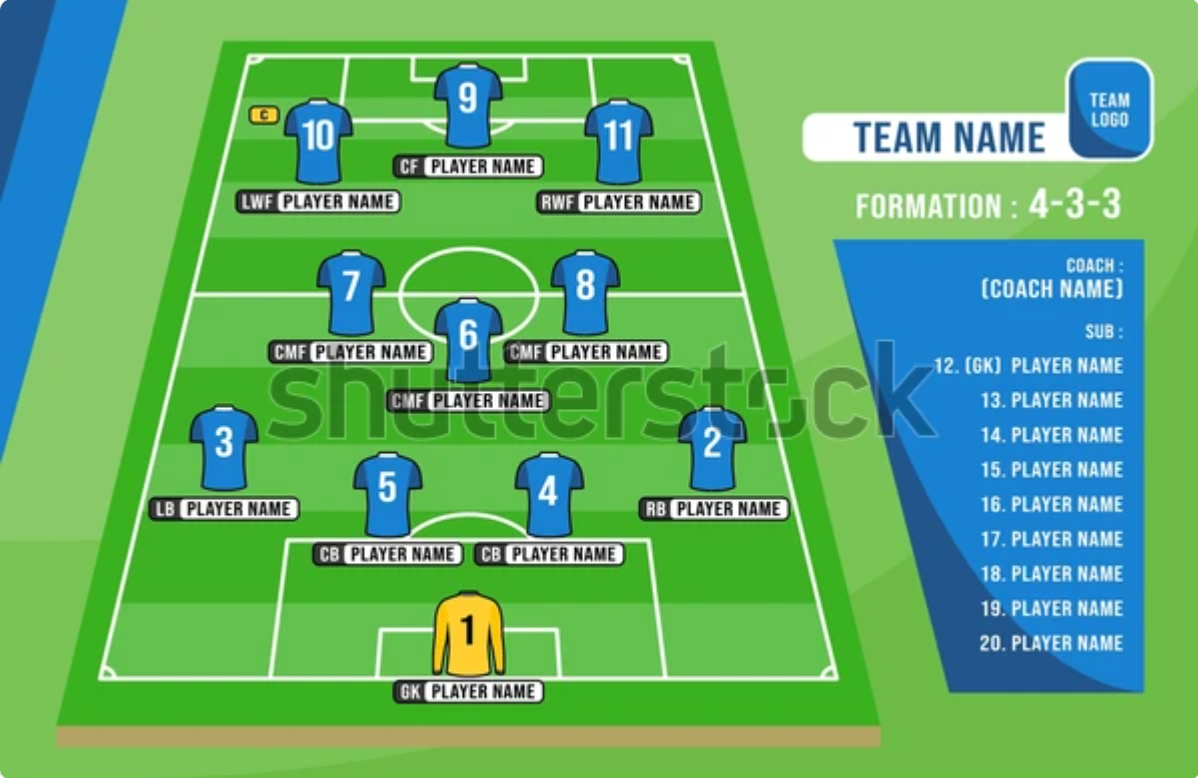


## Basic Checks

In [250]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [251]:
## Stastical summary of the Numarical data
Data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [252]:
## Stastical summary of the Categorical data
Data.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

In [253]:
# filtering out early on columns which would be irrelevant for this project
irrelvant_cols=['sofifa_id', 'player_url', 'long_name', 'dob', 'real_face', 'body_type', 'player_tags','loaned_from', 'joined',
                'team_jersey_number', 'nation_jersey_number', 'contract_valid_until', 'player_traits']
#dropping irrelevant columns
fifa= Data.drop(irrelvant_cols, axis=1)
fifa.shape

(18278, 91)

In [254]:
# checking the Null values in terms of Percentage for every attribute
Null_val_columns=fifa.isnull().sum().sort_values(ascending =False)/players_data.shape[0]*100
Null_val_columns[Null_val_columns>0]

nation_position       93.839589
gk_handling           88.860926
gk_diving             88.860926
gk_kicking            88.860926
gk_reflexes           88.860926
gk_speed              88.860926
gk_positioning        88.860926
cam                   11.139074
physic                11.139074
ram                   11.139074
lam                   11.139074
dribbling             11.139074
rw                    11.139074
rf                    11.139074
cf                    11.139074
lf                    11.139074
lw                    11.139074
rs                    11.139074
st                    11.139074
ls                    11.139074
defending             11.139074
rb                    11.139074
passing               11.139074
lwb                   11.139074
rcb                   11.139074
cb                    11.139074
lcb                   11.139074
lb                    11.139074
shooting              11.139074
rdm                   11.139074
cdm                   11.139074
ldm     

In [255]:
# checking the percentage of the Goal keepers in the team position attribute 
print(f'Number of Goal Keepers : {fifa[fifa['team_position']=="GK"].shape[0]}')
print(f'percentage of Goal Keepers in data : {fifa[fifa['team_position']=="GK"].shape[0]/Data.shape[0]*100 :.3f}')

Number of Goal Keepers : 662
percentage of Goal Keepers in data : 3.622


In [256]:
# checking the percentage of the players apart from Goal keepers in the data
print(f'Number of Players : {fifa[fifa['team_position']!="GK"].shape[0]}')
print(f'percentage of Players  in data : {fifa[fifa['team_position']!="GK"].shape[0]/Data.shape[0]*100 :.3f}')

Number of Players : 17616
percentage of Players  in data : 96.378


In [257]:
# Nation position consist about 93.8% null values which is reduntant to our cluster formation so, we're going to drop that   
fifa.drop('nation_position', axis=1,inplace=True)

## EDA

In [258]:
fifa.head(5)

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   
4          E. Hazard   28        175         74     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   
2          LW, CAM          Right                         5          5   
3               GK          Right                         3          3   
4           LW, CF          Right                         4          4   

   skill_moves      work_rate  release_clause_eur team_position  pace  \
0            4     Medium/Low         195800000.0            RW  87.0   
1            5       High/Low          96500000.0            LW  90.0   
2            5    High/Medium         195200000.0           CAM  91.0   
3            1  Medium/Medium         164700000.0            GK   NaN   
4            4    High/Medium         184500000.0            LW  91.0   

   shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0      92.0     92.0       96.0       39.0    66.0        NaN          NaN   
1      93.0     82.0       89.0       35.0    78.0        NaN          NaN   
2      85.0     87.0       95.0       32.0    58.0        NaN          NaN   
3       NaN      NaN        NaN        NaN     NaN       87.0         92.0   
4      83.0     86.0       94.0       35.0    66.0        NaN          NaN   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         NaN          NaN       NaN             NaN                  88   
1         NaN          NaN       NaN             NaN                  84   
2         NaN          NaN       NaN             NaN                  87   
3        78.0         89.0      52.0            90.0                  13   
4         NaN          NaN       NaN             NaN                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84     

### Univariate Analysis


#### What is the average work rate for attack and defense?


In [260]:
Attaking_attributes=[ 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots']

Defending_attributes=['defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle','mentality_aggression',
                      'mentality_interceptions','power_stamina']
print(f'Length of Attaking_attributes : {len(Attaking_attributes)} \n\nLength of Defending_attributes : {len(Defending_attributes)} ')

Length of Attaking_attributes : 20 

Length of Defending_attributes : 6 


In [270]:
# Attacking attributes with respective their skill
Attack_scores={}
Att_scores=[]
for col in Attaking_attributes:
    if col in fifa.columns:
        Att_scores.append(round(fifa[col].mean(),3))
        
for key,value in zip(Attaking_attributes,Att_scores):
    Attack_scores[key]=value


# Defending attributes with respective their skill
Defend_scores={}
def_score=[]
for col in Defending_attributes:
    if col in fifa.columns:
        def_score.append(round(fifa[col].mean(),3))
        
for key,value in zip(Defending_attributes,def_score):
    Defend_scores[key]=value

print(f'Attaking Attributes : {Attack_scores}\n \n {'---'*25}\n')

print(f' Defending Attributes: {Defend_scores}')

Attaking Attributes : {'attacking_crossing': 49.718, 'attacking_finishing': 45.59, 'attacking_heading_accuracy': 52.221, 'attacking_short_passing': 58.748, 'attacking_volleys': 42.809, 'skill_dribbling': 55.597, 'skill_curve': 47.326, 'skill_fk_accuracy': 42.709, 'skill_long_passing': 52.769, 'skill_ball_control': 58.462, 'movement_acceleration': 64.3, 'movement_sprint_speed': 64.416, 'movement_agility': 63.505, 'movement_reactions': 61.753, 'movement_balance': 63.856, 'power_shot_power': 58.182, 'power_jumping': 64.928, 'power_stamina': 62.889, 'power_strength': 65.235, 'power_long_shots': 46.813}
 
 ---------------------------------------------------------------------------

 Defending Attributes: {'defending_marking': 46.849, 'defending_standing_tackle': 47.64, 'defending_sliding_tackle': 45.607, 'mentality_aggression': 55.742, 'mentality_interceptions': 46.38, 'power_stamina': 62.889}


In [272]:
# Sorting the Attacking scores & Defending scores in descending order
Attack_scores = dict(sorted(Attack_scores.items(), key=lambda item: item[1], reverse=True))
Defend_scores = dict(sorted(Defend_scores.items(), key=lambda item: item[1], reverse=True))

In [276]:
# Fetching the Top 5 Attacking scores & Defending scores
Top_Attack_scores = {k: Attack_scores[k] for k in list(Attack_scores.keys())[:5]}
Top_Defend_scores = {k: Defend_scores[k] for k in list(Defend_scores.keys())[:5]} 

# printing the scores 
print(f'Top 5 Attacking scores :  {Top_Attack_scores} \n \n {'---'*40}\n')
print(f'Top 5 Top_Defending scores :  {Top_Defend_scores}')



Top 5 Attacking scores :  {'power_strength': 65.235, 'power_jumping': 64.928, 'movement_sprint_speed': 64.416, 'movement_acceleration': 64.3, 'movement_balance': 63.856} 
 
 ------------------------------------------------------------------------------------------------------------------------

Top 5 Top_Defending scores :  {'power_stamina': 62.889, 'mentality_aggression': 55.742, 'defending_standing_tackle': 47.64, 'defending_marking': 46.849, 'mentality_interceptions': 46.38}


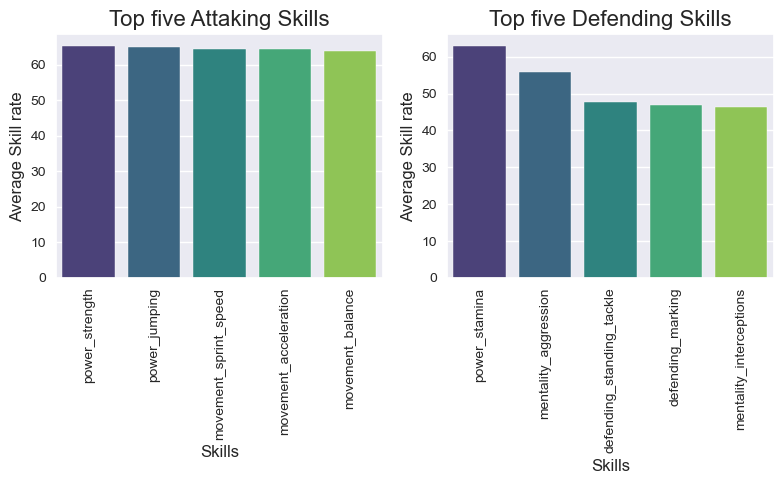

In [277]:
# Plotting the Bar-graph for Top 5 Attacking scores 
X=list(Top_Attack_scores.keys())
Y=list(Top_Attack_scores.values())
data = pd.DataFrame({'Category': X, 'Value': Y})
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
sns.barplot(data=data, x='Category',y='Value', palette='viridis')
plt.title('Top five Attaking Skills', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Average Skill rate', fontsize=12)
plt.xticks(rotation=90)

# Plotting the Bar-graph for Top 5  Defending scores
X1=list(Top_Defend_scores.keys())
Y1=list(Top_Defend_scores.values())
data = pd.DataFrame({'Category': X1, 'Value': Y1})
plt.subplot(1,2,2)
sns.barplot(data=data, x='Category',y='Value', palette='viridis')
plt.title('Top five Defending Skills', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Average Skill rate', fontsize=12)
plt.tight_layout()
plt.show()

- As Data shows that Strength,jumping,Sprint Speed,Acceleration & Movement Balance Skills are the Top Average Skill Rating around 65 than others.
- Power Stamina is the top one skills that most of defending players has with 62 Average Skill rate and Most likely same for standing tackle,Defending Marking & Mentally Interception around 46 and Aggression would be the second highest skill.

####  What is the average work rate for attack and defense?

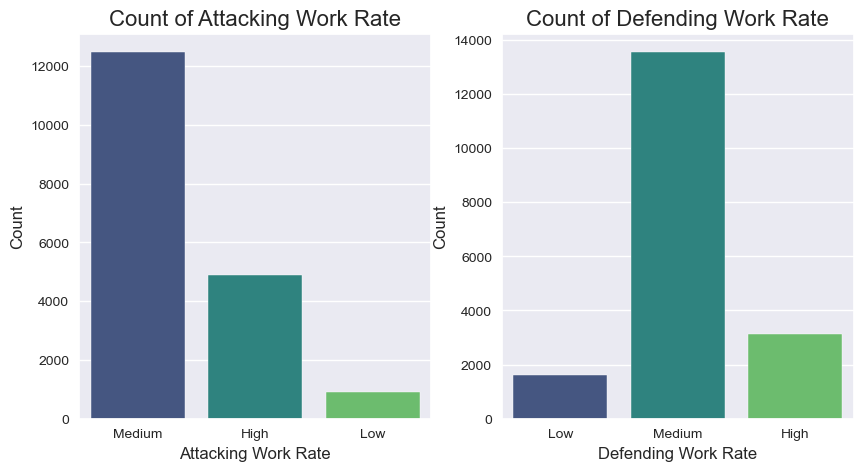

In [280]:
# Extraction of work_rate for Attackers and defenders 
Attack_defend_work_rate=fifa.copy()
Attack_defend_work_rate[['attacking_work_rate', 'defending_work_rate']] = Attack_defend_work_rate['work_rate'].str.split('/', expand=True)

# Plotting the countplot for Attacking work rate
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(data=Attack_defend_work_rate, x='attacking_work_rate', palette='viridis')
plt.title('Count of Attacking Work Rate', fontsize=16)
plt.xlabel('Attacking Work Rate', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plotting the countplot for defending work rate
plt.subplot(1,2,2)
sns.countplot(data=Attack_defend_work_rate, x='defending_work_rate', palette='viridis')
plt.title('Count of Defending Work Rate', fontsize=16)
plt.xlabel('Defending Work Rate', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

-  For both Attackers and Defenders Work Rates is Medium with higher count but comparatively a little greater in Defending work rate than Attaking and the Second highest work rate is High 

#### Player count based on Nationality

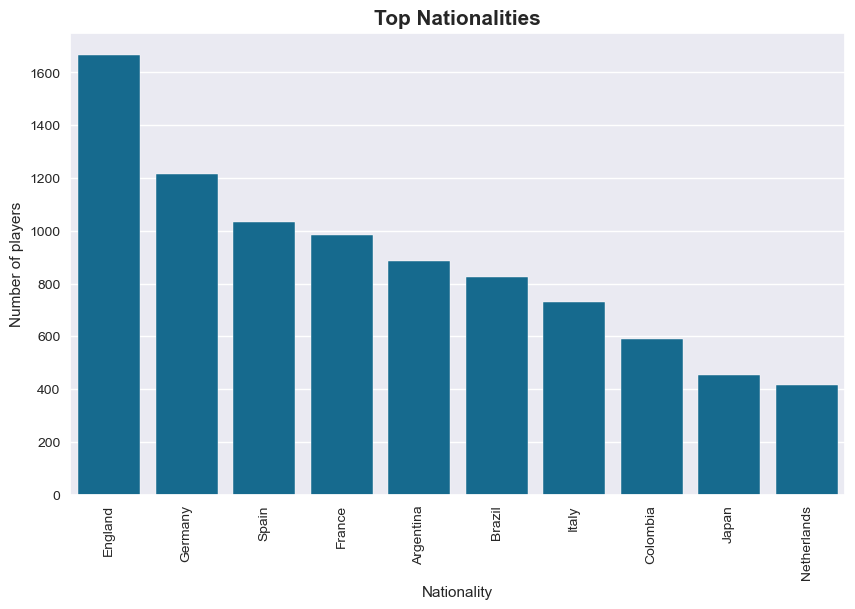

In [284]:
# Fetching top 10 countries based on Number of players
top_nationalities=fifa.nationality.value_counts(ascending=False)[:10]

plt.figure(figsize=(10,6))

# Plotting bar plot for top 10 countries
sns.barplot(x=top_nationalities.keys(), y=top_nationalities)

# labeling
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.xticks(rotation=90)
plt.title('Top nationalities'.title(), fontsize=15, fontweight="bold")
plt.show()

- England has the highest percentage of players in the dataset at 9.12%.
- The top 10 nationalities together account for more than 45% of the players in the dataset, indicating a concentration of players from a relatively small number of countries.
- European countries dominate the top 10, with six of them being from Europe.
- South American countries are also well represented in the top 10, with Argentina and Brazil being in the top 5.
- Japan is the only Asian country in the top 10, indicating a relatively smaller presence of players from Asia in the dataset.
- The differences in percentages between the top 10 countries are relatively small, with the highest percentage (England) being only about 6 percentage points higher than the 10th highest percentage (Netherlands). This suggests a relatively even distribution of players across the top 10 countries in the dataset.

#### Value, Wage and Release Clause of Players

<Axes: ylabel='release_clause_eur'>

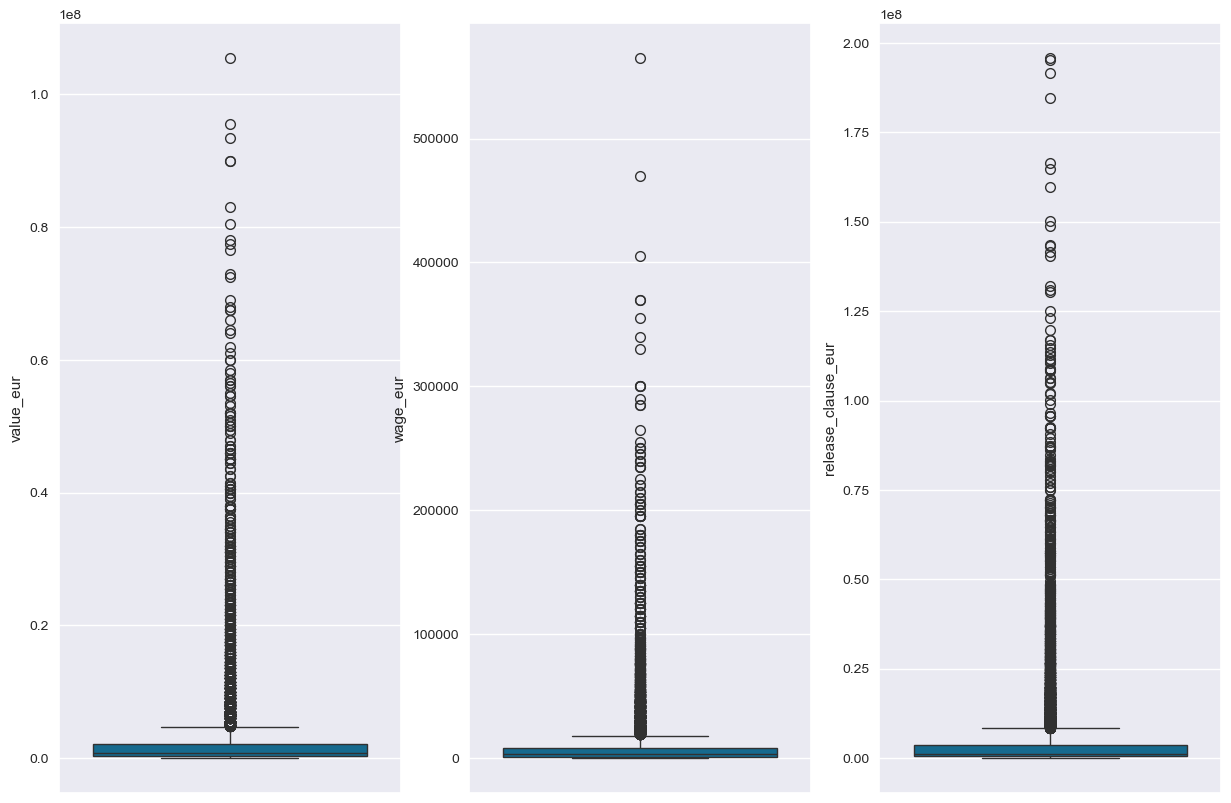

In [285]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)

# plotting Boxplot to check the Outliers by showing that anyone is going to get high value pay
sns.boxplot(y='value_eur',data=fifa)

# plotting Boxplot to check the Outliers by showing that anyone is going to  get high wage pay
plt.subplot(1,3,2)
sns.boxplot(y='wage_eur',data=fifa)

# plotting Boxplot to check the Outliers by showing that anyone has high demand
plt.subplot(1,3,3)
sns.boxplot(y='release_clause_eur',data=fifa)

- There are players who have zero market value, wage, and/or release clause. It appears as values are unavailable or an error in data entry because it does not make much sense that many players will play for free with zero market value
- The distributions of all three attributes are positively skewed, with a long tail towards the higher values.
- The maximum values for all three attributes are significantly higher than their respective third quartiles, indicating the presence of outliers with extremely high values.
- The median wage is much lower than the median market value and median release clause, indicating that players receive a relatively small portion of their market value as wage.

#### Preferred Foot

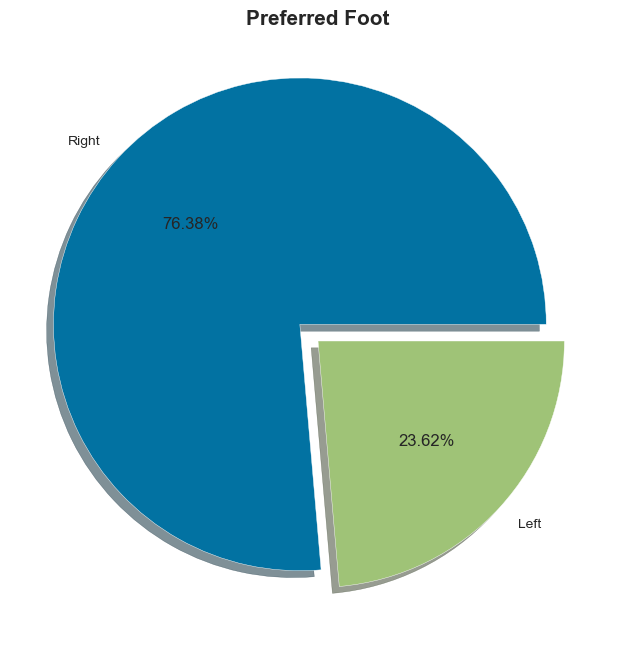

In [286]:
foot=fifa.preferred_foot.value_counts()
plt.figure(figsize=(8,8))

# plotting pie chart to interpret what is the most Preferred foot
plt.pie(foot, labels=foot.keys(), autopct='%.2f%%', explode=[0.1,0], shadow=True)

# labeling the title
plt.title('Preferred foot'.title(), fontsize=15, fontweight="bold");

- The majority of players in the FIFA dataset have a preferred foot of Right, with a count of 13960.
- The number of players with a preferred foot of Left is much smaller, with a count of only 4318 which is equivalent to 23.62% of the total players.
- This suggests that the majority of football players are more comfortable playing with their right foot, which could be due to a variety of factors such as being naturally right-footed or receiving more training and practice on their right side.

#### Overall and Potential Attributes

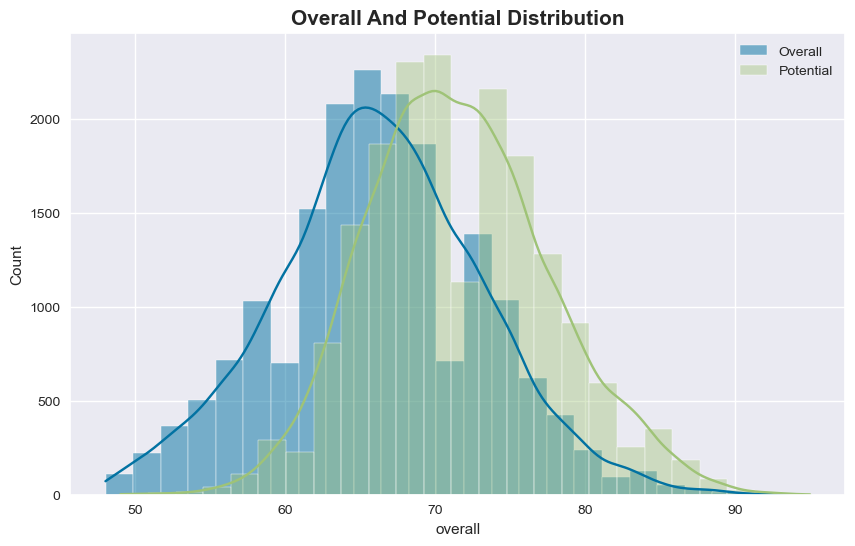

In [287]:
plt.figure(figsize=(10,6))

# ploting the histogram for overall performance and potential to check the distributions
sns.histplot(fifa['overall'], bins=25, alpha=0.5, label='Overall',kde=True)
sns.histplot(fifa['potential'], bins=25, alpha=0.4, label='Potential',kde=True)
plt.legend()
plt.title('Overall and Potential Distribution'.title(), fontsize=15, fontweight="bold");

- Potential attribute is distributed on the right side as compared to Overall attributes. This suggests that many players are yet to level thier potential.
- Overall attribute is gathered more between 60 to 70, whereas, most of the players have potential to be between 65 to 75.

#### Height, Weight and Age Distribution

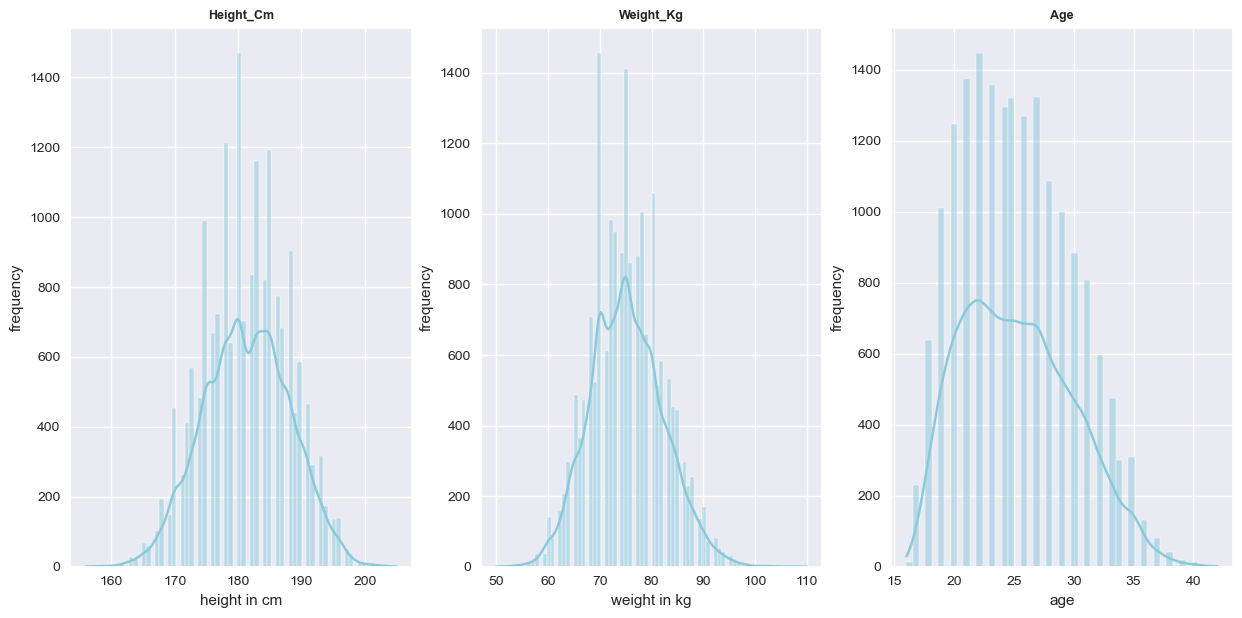

In [288]:
# plotting the Histogram to check the distribution of Height
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(x = fifa["height_cm"],color='c',kde=True)
plt.xlabel("height in cm")
plt.ylabel("frequency")
plt.title("height_cm".title(),fontsize=9,fontweight="bold")

# plotting the Histogram to check the distribution of Weight
plt.subplot(1,3,2)
sns.histplot(fifa["weight_kg"],color='c',kde=True)
plt.xlabel("weight in kg")
plt.ylabel("frequency")
plt.title("weight_kg".title(),fontsize=9,fontweight="bold")

# plotting the Histogram to check the distribution of Age
plt.subplot(1,3,3)
sns.histplot(fifa["age"],color='c',kde=True)
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("age".title(),fontsize=9,fontweight="bold")
plt.show()

- All 3 attributes appear to follow normal distribution
- Heights of most of the players gathered around 175 cm to 185 cm. Highest peak is seen at 180 cm.
- Most players in the fifa dataset weighed around 70 kg to 85kg. Most number of players has weight of 75 kg.
- Age distribution appeared to be slightly right skewed. Players' age is spread a bit more on the right side than the left one. Most number of players fell into age between 18 to 30 years.

### Bivariate Analysis


#### Ball Control vs Dribbling Correlation

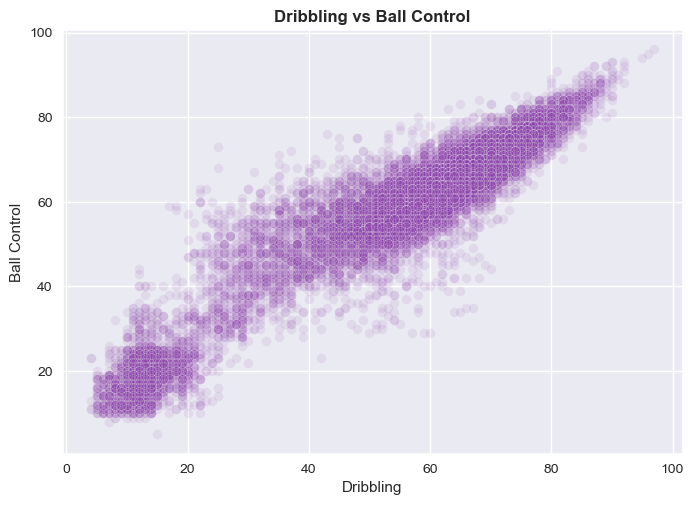

In [292]:
# plotting the scatter plot for checking the correlation b/w Dribbling and Ball control
sns.scatterplot(x=fifa.skill_dribbling,y=fifa.skill_ball_control,alpha=0.1,color="#8e44ad")
plt.xlabel("Dribbling")
plt.ylabel("Ball Control")
plt.title("Dribbling vs Ball Control",fontweight="bold")
plt.show()

-  It shows a bit Linear relationship as Dribbiling increase Ball Control increases as well , But in medium range the Ball control will not sustain for long.

#### Weight and Height Correlation

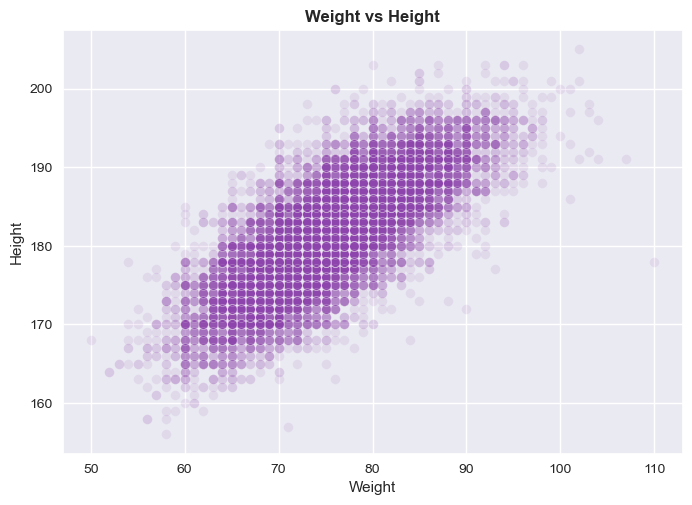

In [293]:
# plotting the scatter plot for checking the correlation b/w Weight and Height
sns.scatterplot(x=fifa.weight_kg,y=fifa.height_cm,alpha=0.1,color="#8e44ad")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height",fontweight="bold")
plt.show()

- From above scatterplot it is evident that weight and height are in linear in nature i.e height of players increases with respect to  weight of players.

#### Age and Performance Correlation

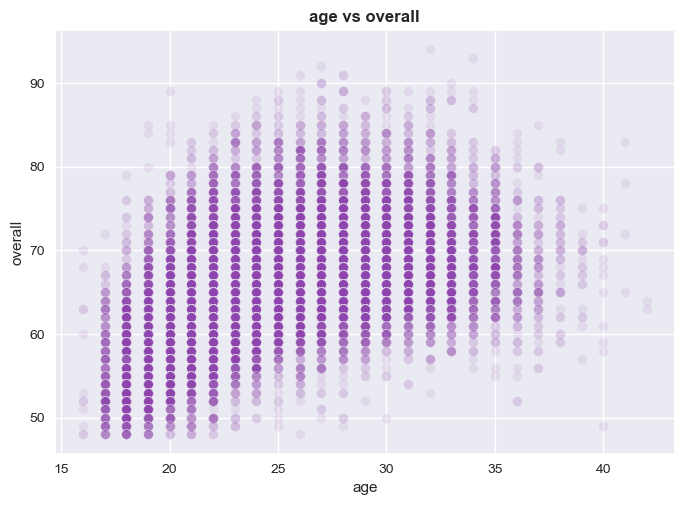

In [294]:

# plotting the scatter plot for checking the correlation b/w Age and Overall performance
sns.scatterplot(x=fifa.age,y=fifa.overall,alpha=0.1,color="#8e44ad")
plt.xlabel("age")
plt.ylabel("overall")
plt.title("age vs overall",fontweight="bold")
plt.show()

- Above scatterplot is indicating that the age and performance are non linear in nature ,even less age players performance is really great and the some Aged players performance is very bad compared to other best performers.

#### Age Vs Other Attributes

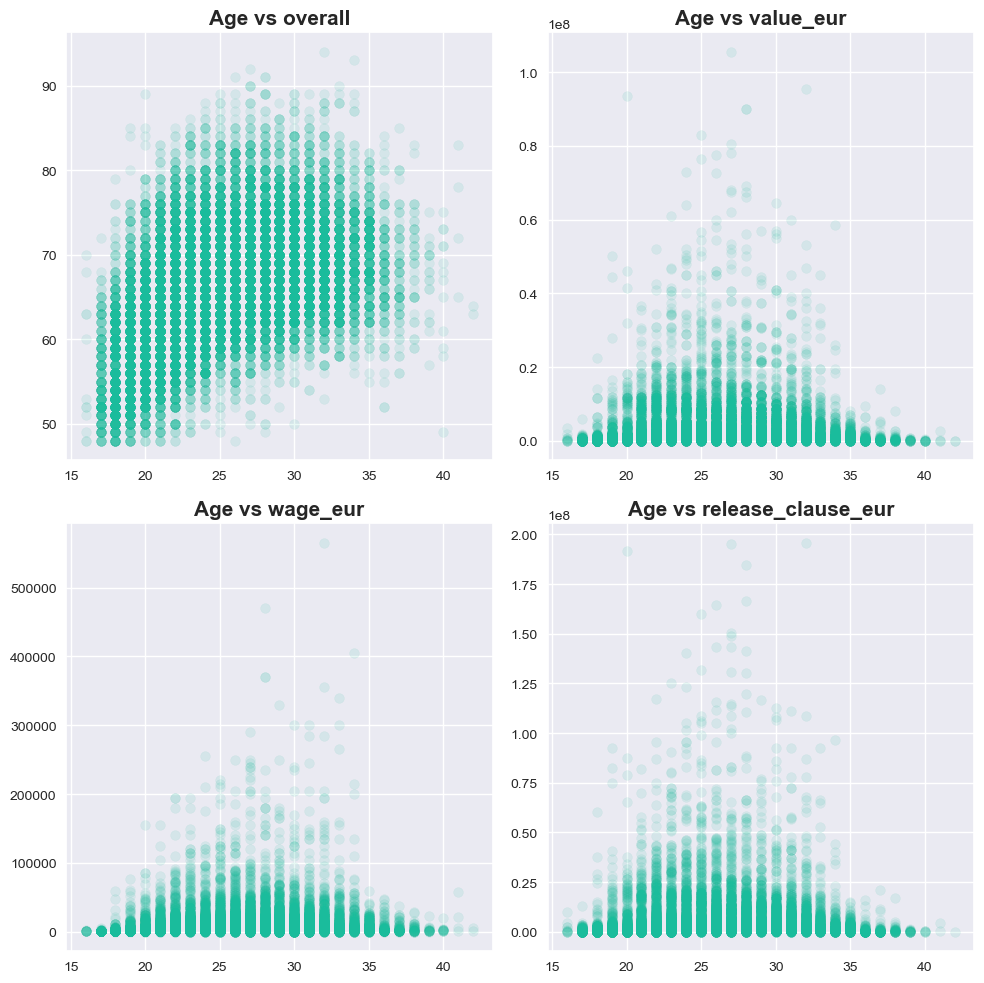

In [295]:
# columns to compare with Age

columns=['overall', 'value_eur', 'wage_eur', 'release_clause_eur']

fig, ax=plt.subplots(2,2, figsize=(10,10))

for col, ax in zip(columns, ax.flatten()):
    ax.scatter(fifa['age'], fifa[col], alpha=0.1, color="#1abc9c")
    ax.set_title('Age vs {}'.format(col), fontsize=15, fontweight="bold")
plt.tight_layout()

- For Age vs Overall, the general trend is upward. It insuinitate that players who spent more years playing on the pitch gained more overall rating. However, the trend is moderate. Some players show higher overall ratings than many players despite being younger and vice-versa is true for some players as well. Surely, natural talent plays a role in players' development. Looking at Haaland and Mbappe, we need not ask for proof.
- When attribute 'age' is plotted against players values, wage and release clause, we have observed that values are normally distributed across age. Value, wage and Release clause is higher for player who fall in age group between 21 years and 34 years with tails on both sides. This means that players value, wage and release clause in lower at the begining and end of the their career. 
- By comparing age with other attributes, we can observe that player reaches his prime in the mid of 30. skills and earned value for any player is lesser at beginning and end of his career and maximum at around 25-30 years of his age.

#### Height vs Overall Correlation

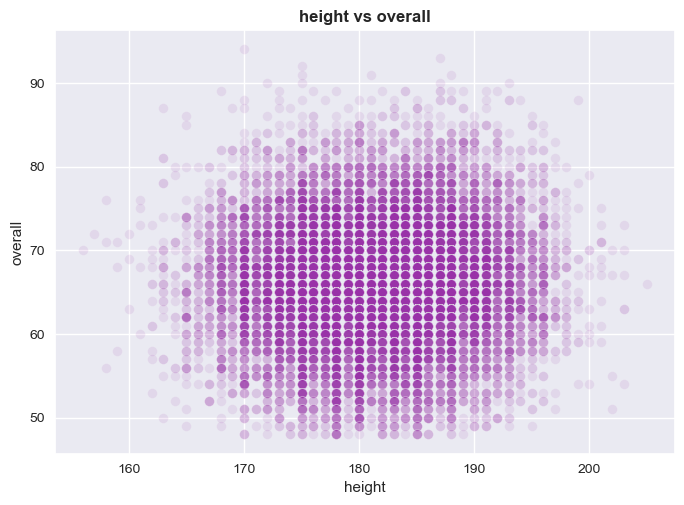

In [296]:
# plotting the scatter plot for checking the correlation b/w Height and Overall Performance
sns.scatterplot(x=fifa.height_cm,y=fifa.overall,alpha=0.1,color="#9932a8")
plt.xlabel("height")
plt.ylabel("overall")
plt.title("height vs overall",fontweight="bold")
plt.show()

- The height and overall performance is not correlated i.e the overall performance is neither decreasing nor increasing wrt height of players but most of the players height is in between 170cm - 195cm.

#### Release clause vs Value and Wage

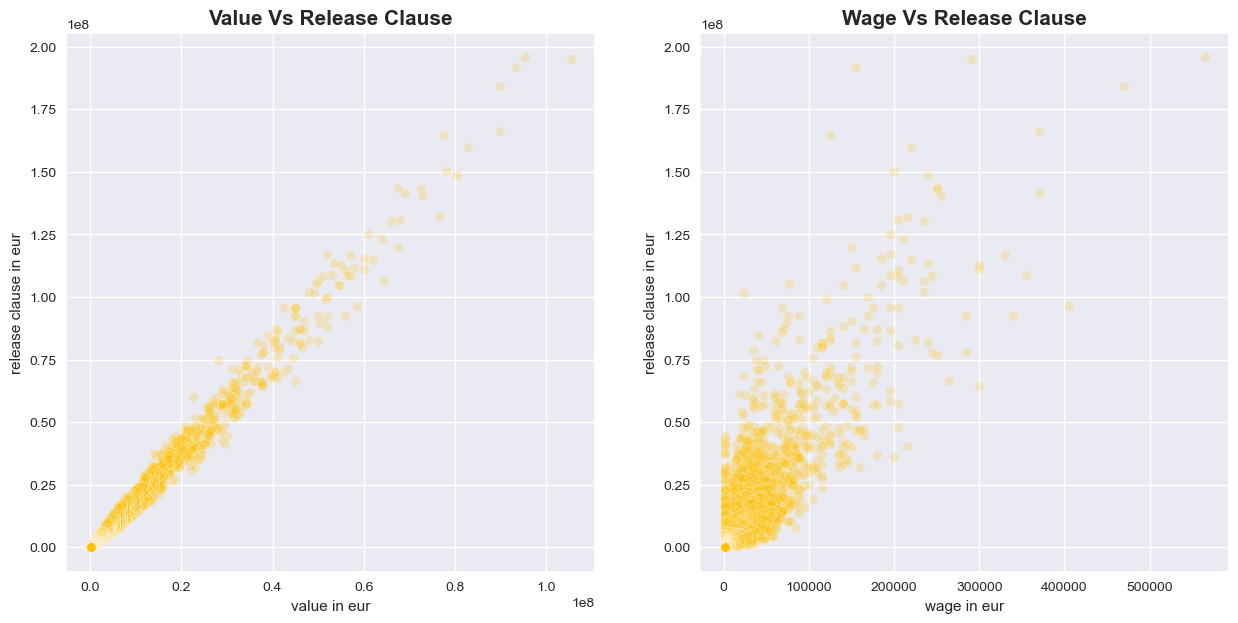

In [297]:
# plotting the scatter plot for checking the correlation b/w Value and release clause in euros
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(x='value_eur', y='release_clause_eur', data=fifa, alpha=0.2,color="#FFC107")
plt.xlabel('value in eur')
plt.ylabel('release clause in eur')
plt.title('value vs release clause'.title(), fontsize=15, fontweight="bold")

# plotting the scatter plot for checking the correlation b/w Wage and release clause in euros
plt.subplot(1,2,2)
sns.scatterplot(x='wage_eur', y='release_clause_eur', data=fifa, alpha=0.2,color="#FFC107")
plt.xlabel('wage in eur')
plt.ylabel('release clause in eur')
plt.title('wage vs release clause'.title(), fontsize=15, fontweight="bold");

- Players release clause is strongly correlated with his value. Player with higher value tend to have higher release clause included in his contract.
- Wage also shows postive corrleation with release clause. However, it is not as strong as the one between value and release clause.
- As we go on increase value, age or release clause, the number of players falling into higher groups decreases and scatter plot appears dispersed.

#### Eldest Players

In [298]:
# Fetching the Eldest players based on their Age
Eldest_player=fifa[players_data["age"]==fifa.age.max()]
Eldest_player

short_name  age  height_cm  weight_kg   nationality  \
11832      C. Muñoz   42        177         73     Argentina   
13003  H. Sulaimani   42        173         70  Saudi Arabia   

                               club  overall  potential  value_eur  wage_eur  \
11832  CD Universidad de Concepción       64         64      50000      1000   
13003                       Al Ahli       63         63          0      5000   

      player_positions preferred_foot  international_reputation  weak_foot  \
11832               GK          Right                         1          3   
13003               LB           Left                         1          3   

       skill_moves      work_rate  release_clause_eur team_position  pace  \
11832            1  Medium/Medium             68000.0            GK   NaN   
13003            3    High/Medium                 NaN            LB  47.0   

       shooting  passing  dribbling  defending  physic  gk_diving  \
11832       NaN      NaN        NaN        NaN     NaN       64.0   
13003      53.0     68.0       64.0       64.0    72.0        NaN   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
11832         63.0        66.0         61.0      55.0            64.0   
13003          NaN         NaN          NaN       NaN             NaN   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
11832                  25                   15                          13   
13003                  70                   43                          61   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
11832                       36                 12               22   
13003                       67                 43               63   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
11832           19                 20                  34                  31   
13003           69                 69                  68                  64   

       movement_acceleration  movement_sprint_speed  movement_agility  \
11832                     53                     56                33   
13003                     46                     47                64   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
11832                  62                58                50             73   
13003                  64                68                65             69   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
11832             29              65                20                    35   
13003             58              72                63                    92   

       mentality_interceptions  mentality_positioning  mentality_vision  \
11832                       25                     16                45   
13003                       65                     64                68   

       mentality_penalties  mentality_composure  defending_marking  \
11832                   24                   62                 18   
13003                   60                   66                 62   

       defending_standing_tackle  defending_sliding_tackle  \
11832                         14                        19   
13003                         66                        63   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
11832                  64                    63                   66   
13003                  15                     8                   15   

       goalkeeping_positioning  goalkeeping_reflexes    ls    st    rs    lw  \
11832                       64                    61   NaN   NaN   NaN   NaN   
13003                       14                    13  58+2  58+2  58+2  60+2   

         lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
11832   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13003  60+2  60+2  60+2  60+2  62+2  62+2  6

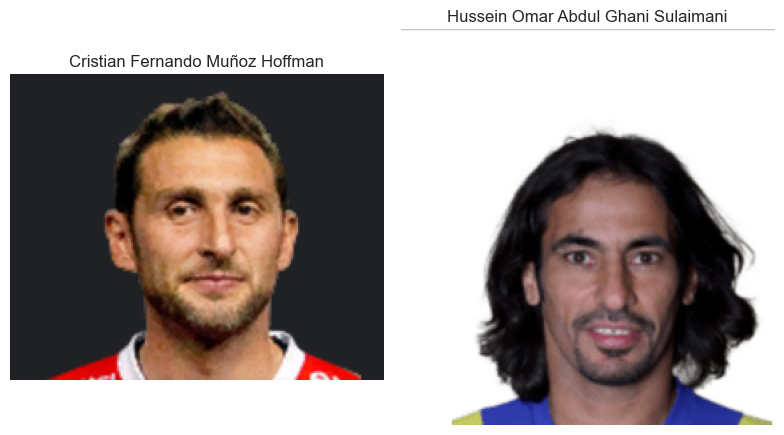

In [244]:
image1 = Image.open('Cristian Fernando Muñoz Hoffman.png')
image2 = Image.open('Hussein Omar Abdul Ghani Sulaimani.png')

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Display the images
axes[0].imshow(image1)
axes[0].axis('off')  
axes[0].set_title('Cristian Fernando Muñoz Hoffman')

axes[1].imshow(image2)
axes[1].axis('off') 
axes[1].set_title('Hussein Omar Abdul Ghani Sulaimani')

plt.tight_layout()
plt.show()

- There are 2 players who are playing at the age of 42 years

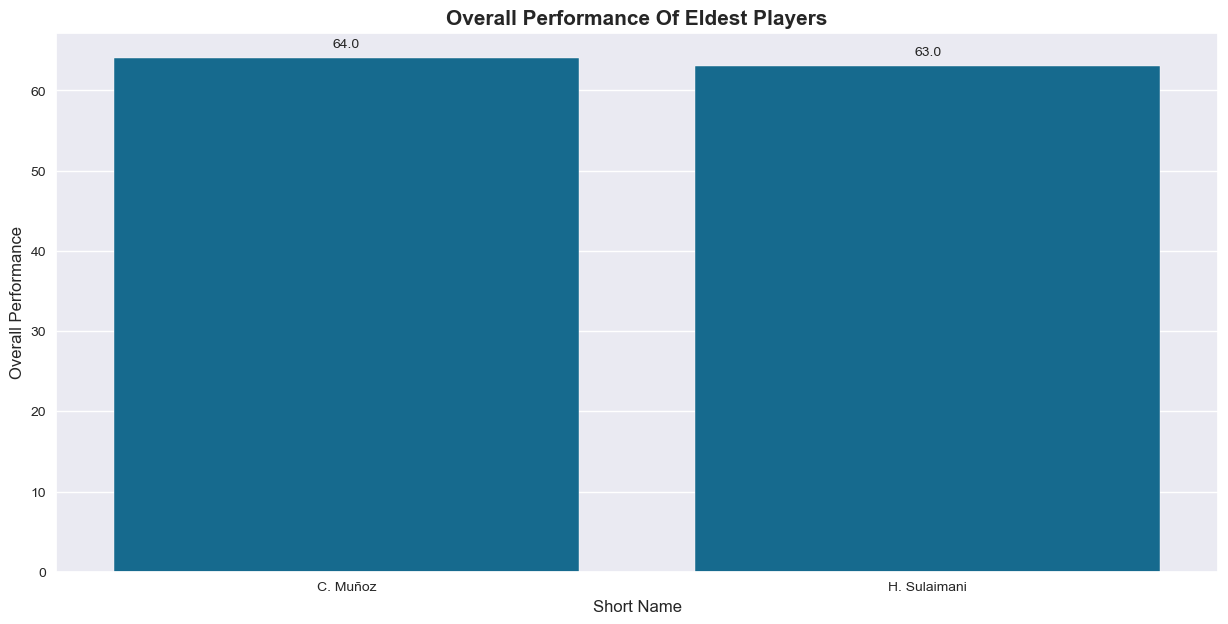

In [300]:
plt.figure(figsize=(15, 7))

# plotting Bar Plot b/w short names and Overall performers
sns.barplot(x=Eldest_player["short_name"], y=Eldest_player["overall"])
plt.xlabel("Short Name", fontsize=12)
plt.ylabel("Overall Performance", fontsize=12)
plt.title('Overall Performance of Eldest Players'.title(), fontsize=15, fontweight="bold")

# Annotate percentage or values above the bars
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height() 
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 1,  
        f"{height:.1f}", 
        ha='center',  
        va='bottom', 
        fontsize=10 
    )

plt.show()


- Both players seem to have high and nearly identical overall performance scores with a difference of 1 point each other.
- From above graph it is evident that the eldest players overall performance is Average.

#### Young Players

In [299]:
# Fetching the Youngest players based on their Age
Young_players=players_data[fifa["age"]==players_data.age.min()]
Young_players

sofifa_id                                         player_url  \
4764      246618  https://sofifa.com/player/246618/adam-hlozek/2...   
6630      252037  https://sofifa.com/player/252037/fabio-daniel-...   
12158     252259  https://sofifa.com/player/252259/enzo-millot/2...   
12160     247888  https://sofifa.com/player/247888/sebastiano-es...   
14626     252238  https://sofifa.com/player/252238/alan-velasco/...   
17614     248187  https://sofifa.com/player/248187/daniel-obbekj...   
17782     248567  https://sofifa.com/player/248567/sebastian-and...   
17827     251219  https://sofifa.com/player/251219/darragh-burns...   
18031     246815  https://sofifa.com/player/246815/oliver-stefan...   
18171     252892  https://sofifa.com/player/252892/joseph-starbu...   
18242     246410  https://sofifa.com/player/246410/robin-wikberg...   
18243     247100  https://sofifa.com/player/247100/elliott-sarto...   

          short_name                  long_name  age         dob  height_cm  \
4764       A. Hložek                Adam Hložek   16  2002-07-25        185   
6630     Fábio Silva  Fábio Daniel Soares Silva   16  2002-07-19        185   
12158      E. Millot                Enzo Millot   16  2002-07-17        175   
12160    S. Esposito        Sebastiano Esposito   16  2002-07-02        186   
14626     A. Velasco               Alan Velasco   16  2002-07-27        167   
17614    D. Obbekjær            Daniel Obbekjær   16  2002-07-16        193   
17782    S. Anderson         Sebastian Anderson   16  2002-08-08        175   
17827       D. Burns              Darragh Burns   16  2002-08-06        176   
18031  O. Stefánsson          Oliver Stefánsson   16  2002-08-03        190   
18171    J. Starbuck            Joseph Starbuck   16  2002-08-03        174   
18242     R. Wikberg              Robin Wikberg   16  2002-07-03        186   
18243   E. Sartorius          Elliott Sartorius   16  2002-07-29        174   

       weight_kg       nationality                    club  overall  \
4764          80    Czech Republic            Sparta Praha       70   
6630          75          Portugal                FC Porto       68   
12158         65            France               AS Monaco       63   
12160         75             Italy                   Inter       63   
14626         63         Argentina           Independiente       60   
17614         86           Denmark         Odense Boldklub       53   
17782         64     United States         Colorado Rapids       52   
17827         62  Northern Ireland  St. Patrick's Athletic       52   
18031         75           Iceland          IFK Norrköping       51   
18171         69           England            Grimsby Town       49   
18242         72            Sweden           Östersunds FK       48   
18243         69           England            Lincoln City       48   

       potential  value_eur  wage_eur player_positions preferred_foot  \
4764          86    3500000      1000       RW, ST, RM          Right   
6630          85    1800000      1000               ST          Right   
12158         86     800000      1000               CM           Left   
12160         85     825000      2000               ST          Right   
14626         83     450000      1000       LM, RM, ST          Right   
17614         71     110000      1000               CB          Right   
17782         75     100000      1000               RB          Right   
17827         69     100000      1000           RM, LM          Right   
18031         64      60000      1000               CB           Left   
18171         72      60000      1000               CM          Right   
18242         67      50000      1000          CB, CDM          Right   
18243         67      60000      1000               ST          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
4764                          1          3            3    High/Medium   
6630                          1  

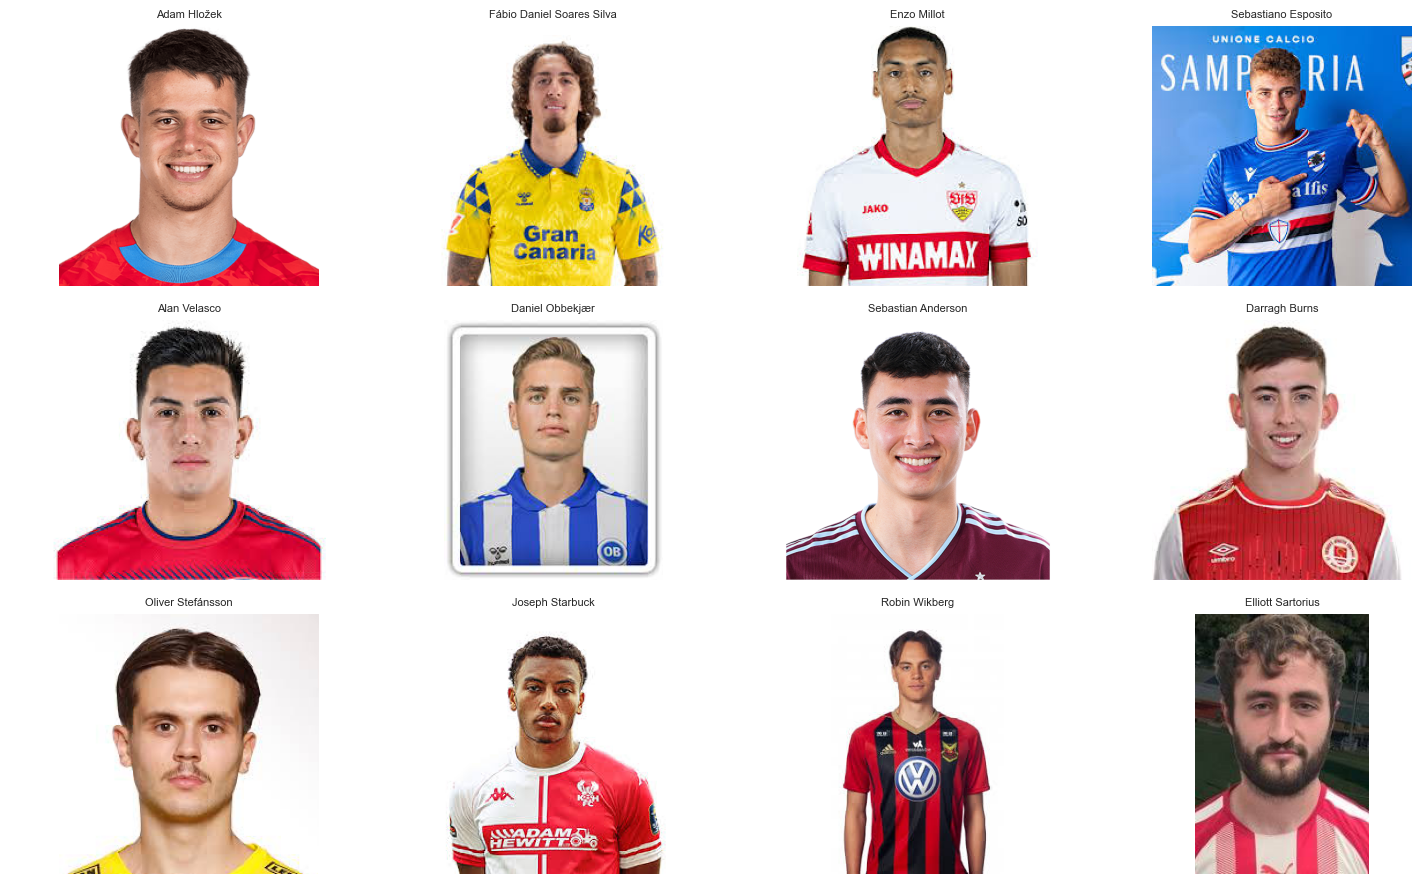

In [304]:
image1 = Image.open('Adam Hložek.webp')
image2 = Image.open('Fábio Daniel Soares Silva.jpg')
image3 = Image.open('Enzo Millot.jpg')
image4 = Image.open('Sebastiano Esposito.jpg')
image5 = Image.open('Alan Velasco.jpg')
image6 = Image.open('Daniel Obbekjær.jpg')
image7 = Image.open('Sebastian Anderson.png')
image8 = Image.open('Darragh Burns.jpg')
image9 = Image.open('Oliver Stefánsson.jpg')
image10 = Image.open('Joseph Starbuck.jpg')
image11 = Image.open('Robin Wikberg.jpg')
image12 = Image.open('Elliott Sartorius.jpg')

# List of images and their labels
images = [
    (image1, "Adam Hložek"),
    (image2, "Fábio Daniel Soares Silva"),
    (image3, "Enzo Millot"),
    (image4, "Sebastiano Esposito"),
    (image5, "Alan Velasco"),
    (image6, "Daniel Obbekjær"),
    (image7, "Sebastian Anderson"),
    (image8, "Darragh Burns"),
    (image9, "Oliver Stefánsson"),
    (image10, "Joseph Starbuck"),
    (image11, "Robin Wikberg"),
    (image12, "Elliott Sartorius")
]

cols = 4  
rows = len(images) // cols + (len(images) % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, (img, label) in enumerate(images):
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(label, fontsize=8)

for j in range(len(images), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- There are 12 players who are playing at the age of 16 years

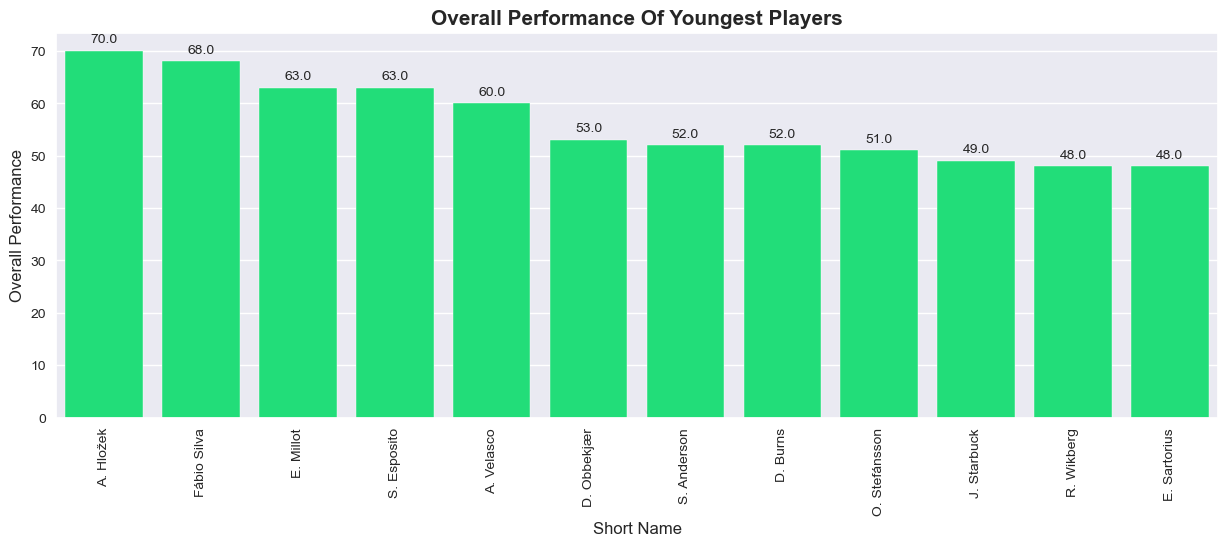

In [305]:
plt.figure(figsize=(15, 5))

# plotting Bar Plot b/w short names and Overall performers
sns.barplot(x=Young_players["short_name"], y=Young_players["overall"], color="#03fc77")
plt.xlabel("Short Name", fontsize=12)
plt.ylabel("Overall Performance", fontsize=12)
plt.title('Overall Performance of Youngest Players'.title(), fontsize=15, fontweight="bold")
plt.xticks(rotation=90)

# Annotate values above the bars
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()  
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 1, 
        f"{height:.1f}", 
        ha='center',  
        va='bottom',  
        fontsize=10 
    )

plt.show()


- Adam Hložek has the highest performance score, followed closely by others like Daniel Soares Silva and Enzo Millot.
- The differences in performance scores among players appear relatively small, indicating a competitive group.

#### Top NexGen: Wonderkids in Football

Football has always been a sport that is heavily reliant on young talent. Many young players, even teenagers, have made their mark on the biggest stage of football, whether it's in domestic leagues or international tournaments. One of the most exciting prospects in football is the NextGen wonderkids, players who are under the age of 20 and have the potential to become superstars in the future.

These NextGen wonderkids are scouted and nurtured by some of the biggest clubs in the world, and their potential is measured by their rating in the FIFA video game series. A potential rating of 90 or higher in FIFA is considered to be exceptional and indicates that the player has the ability to become a world-class player.

Some of the most famous NextGen wonderkids in football history include Lionel Messi, who made his debut for Barcelona at the age of 16, Kylian Mbappe, who won the World Cup with France at the age of 19, and Jadon Sancho, who became one of the most expensive English players of all time at the age of 20.

Filtering out NextGen wonderkids who meet the age and potential rating criteria can be a daunting task, but it can provide valuable insights into the future of football. These players have the potential to shape the sport for years to come and can be instrumental in determining the success of their respective clubs and national teams.

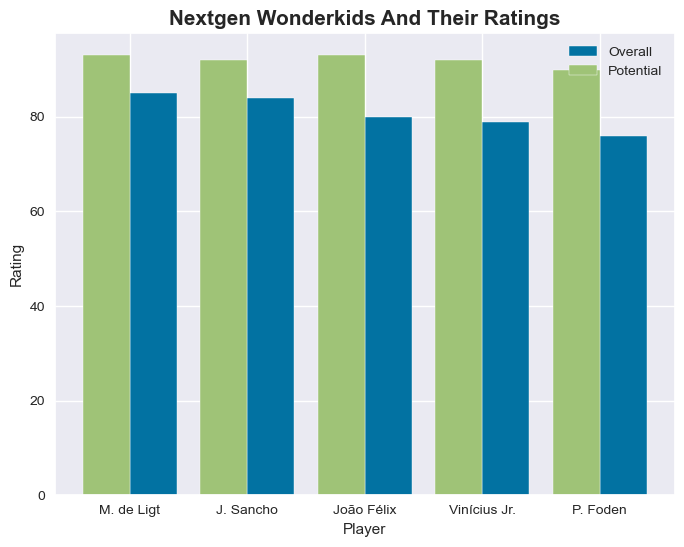

In [306]:
# plotting Bargraphs for both Overall and Potential for Youngest players who thrive for Next Generation football players
next_gen= fifa[(fifa['age']<20) & (fifa['potential']>=90)]

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(next_gen['short_name'], next_gen['overall'], width=0.4, align='edge')
ax.bar(next_gen['short_name'], next_gen['potential'], width=-0.4, align='edge')

ax.set_xlabel('Player')
ax.set_ylabel('Rating')
ax.legend(['Overall', 'Potential'])
ax.set_title('NextGen Wonderkids and their Ratings'.title(), fontsize=15, fontweight="bold");


- The players listed are all under the age of 20, which highlights the focus on developing young talent in football.
- All of the players have high potential ratings, with four of them having a potential rating of 90 or above. This indicates that they have the potential to become top players in the future.
- The players represent a diverse range of nationalities, including Netherlands, England, Portugal, and Brazil.
- Juventus has the youngest player on the list, Matthijs de Ligt, who is only 19 years old but already has a high overall rating of 85.
- João Félix, who plays for Atlético Madrid, has the highest potential rating on the list at 93. He is also one of the youngest players on the list, at just 19 years old.

Despite being young and having high potential ratings, the players' current wages and values are relatively low compared to more established players in the sport. For example, the highest valued player on the list, Matthijs de Ligt, has a value of 50 million euros, which is a fraction of the value of players like Lionel Messi or Cristiano Ronaldo.

The players listed have a variety of positions, including center back, right and left midfield, center forward, striker, and attacking midfield. This indicates that young talent is being developed across all areas of the field.
Overall, these next generation wonderkids represent the future of football and are highly sought after by top clubs looking to secure their talent. It will be interesting to see how their careers develop in the coming years and if they live up to their potential.

#### Who are the most valued players?

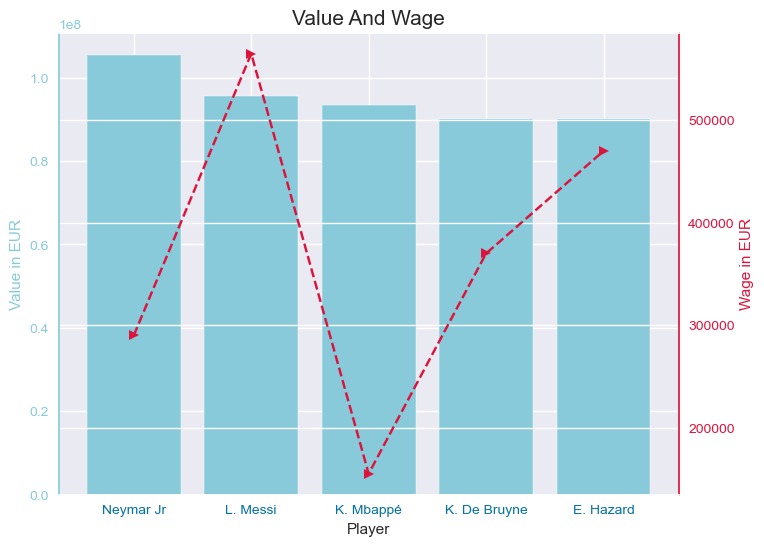

In [307]:
# Fetching Top 5 high paid players
most_valued= fifa[['short_name', 'value_eur', 'wage_eur']].sort_values('value_eur', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(most_valued.short_name, most_valued.value_eur, color= 'c', label='value')
ax1.set_ylabel('Value in EUR', color='c')
ax1.tick_params(axis='y', labelcolor= 'c')
ax1.set_xticklabels(labels= most_valued.short_name)

#creating twin y axis as ax2
ax2 = ax1.twinx()

ax2.plot(most_valued.short_name, most_valued.wage_eur, c='crimson', linestyle='--', marker='>', label= 'wage')
ax2.set_ylabel('Wage in EUR', color='crimson')
ax2.tick_params(axis='y', labelcolor= 'crimson')

ax1.set_xlabel('Player')
ax1.tick_params(axis='x', labelcolor= "b")
plt.title('Value and Wage'.title(), fontsize=15)

ax2.spines['left'].set_color('c')
ax2.spines['right'].set_color('crimson');

The results are in, and the most valued FIFA 20 player is none other than **Neymar Jr!** With a whopping value of **105.5 million euros** and a weekly wage of **290,000 euros**, Neymar Jr is certainly living up to his reputation as one of the best players in the world.

But that's not all - coming in at a close second is none other than **Lionel Messi**, valued at **95.5 million euros** and earning a weekly wage of **565,000 euros**. Messi is widely regarded as one of the greatest footballers of all time, and it's no surprise to see him near the top of the list.

In third place is **Kylian Mbappé**, the young French superstar who has taken the football world by storm. Valued at **93.5 million euro** and earning a weekly wage of **155,000 euros**, Mbappé is certainly one to watch for the future.

Fourth and fifth place are occupied by two of the Premier League's finest - **Eden Hazard and Kevin De Bruyne**. Hazard, who recently made the switch from Chelsea to Real Madrid, is valued at **90 million euros** and earns a weekly wage of *470,000 euros*. De Bruyne, who has been in sensational form for Manchester City, is also valued at **90 million euros** but earns a slightly lower weekly wage of **370,000 euros**.

It's fascinating to see the differences in value and wage among these top players. While Neymar Jr is the most valued player, he earns a lower weekly wage than Lionel Messi, who is valued slightly lower. Similarly, Kevin De Bruyne is valued the same as Eden Hazard, but earns a lower weekly wage. These differences could reflect a variety of factors, such as the players' performance on the pitch, their age, and their marketability.

**One notable fact to note is that Neymar Jr's value is more than double that of his Paris Saint-Germain teammate, Kylian Mbappé**. This could reflect Neymar Jr's experience and track record in the sport, as well as his marketability off the pitch.

Overall, the list of the most valued players in FIFA 20 is a fascinating glimpse into the world of professional football. These players have worked hard to achieve their success, and it's exciting to see how their careers will develop in the years to come.

#### High Paid Wages with respect to the players posision

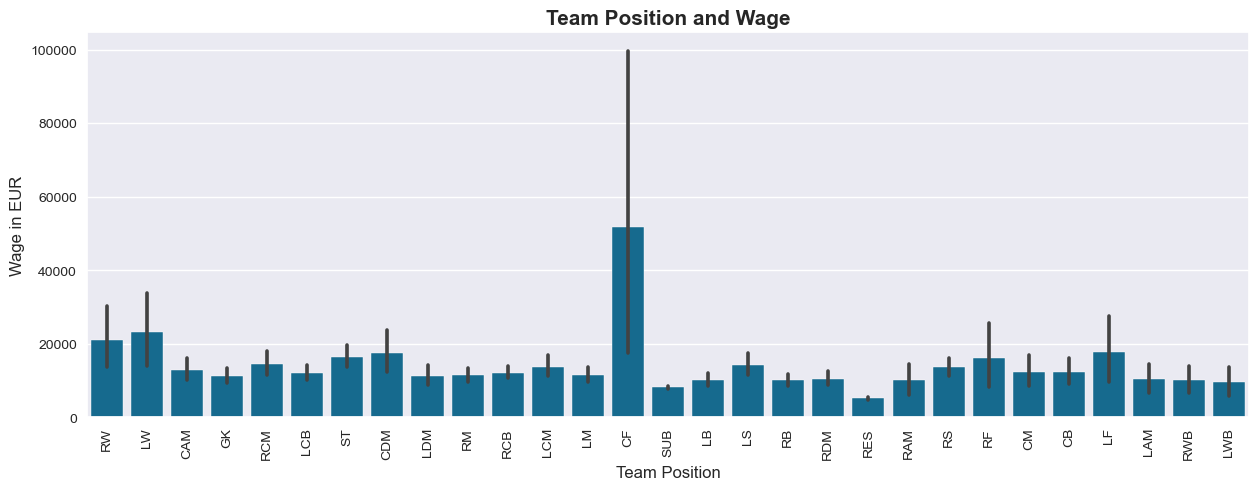

In [308]:
plt.figure(figsize=(15, 5))

# plotting bar graph for team posision with respective to wage
sns.barplot(x=fifa.team_position, y=fifa.wage_eur)
plt.xlabel('Team Position', fontsize=12)
plt.ylabel('Wage in EUR', fontsize=12)
plt.title('Team Position and Wage', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()


- The "CF" (Center Forward) position exhibits the highest average wage, along with a significant range of wages, as represented by the error bars. This suggests that players in this position can command premium wages, with a few top players potentially skewing the average.
- Other attacking roles like "RW" (Right Wing), "LW" (Left Wing), "CAM" (Center Attacking Midfield), and "ST" (Striker) also show relatively higher wages compared to most other positions.
- Wages for defensive roles like "CB" (Center Back), "RB" (Right Back), "LB" (Left Back), and "GK" (Goalkeeper) tend to be lower, with less variation compared to attacking and midfield roles.
- Positions like "SUB" (Substitutes) and "RES" (Reserves) have the lowest wages on average, indicating that non-starting players typically earn less.
- Midfielders generally have consistent wages, with some variation in defensive and central midfield positions like "CDM" (Center Defensive Midfield).
- The error bars highlight the variability within each position. Positions with longer bars, like "CF" and "LW," suggest higher wage disparity, likely influenced by star players.


#### Comparing Top Players

In [311]:
# Filtering the player attributes from the data
player_attributes=fifa[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_positioning',
       'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 
       'skill_dribbling', 'skill_curve','skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance',
       'power_shot_power','power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 
       'defending_marking', 'defending_standing_tackle','defending_sliding_tackle', 
       ]]

In [312]:
attributes = ['gk', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending']

for attr in attributes:
    # Select columns matching the attribute
    cols = [col for col in player_attributes.columns if attr in col]
    
    # Calculate the mean of the selected columns
    player_attributes[attr] = player_attributes[cols].mean(axis=1)
    
    # Replace NaN values with 0 (or another desired value) before converting to integer
    player_attributes[attr] = player_attributes[attr].fillna(0).astype('int')

In [313]:
# comparing two players with their attributes
def compare_players(player1, player2, attributes=None):
    
    attributes = attributes or ['gk', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending']
    
    data = [
        go.Scatterpolar(
            r=player_attributes.loc[player_attributes['short_name'] == player, attributes].values[0],
            theta=attributes,
            fill='toself',
            name=player,
            line=dict(color=f"rgba({255*(i==0)},{255*(i==1)},100,1)")
        )
        for i, player in enumerate([player1, player2])
    ]
    
    fig = go.Figure(
        data=data,
        layout=go.Layout(
            polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
            showlegend=True,
            legend=dict(x=0.1, y=1.1)
        )
    )
    fig.show()

#### Messi vs Ronaldo:

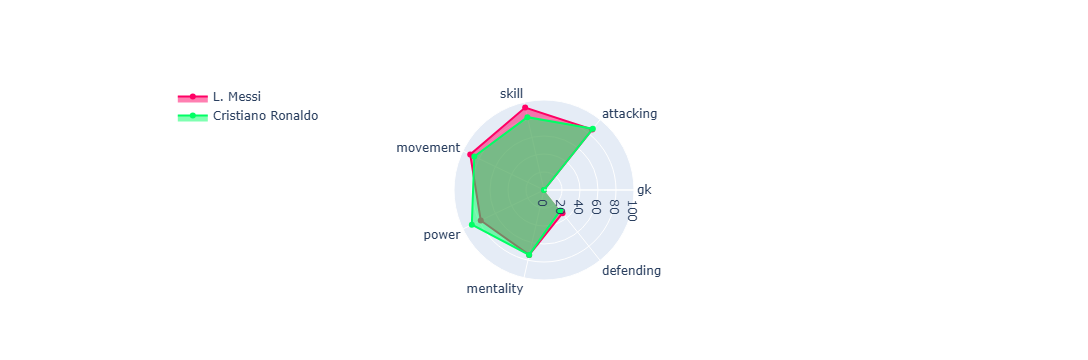

In [314]:
compare_players('L. Messi','Cristiano Ronaldo')

When it comes to comparing two of the biggest names in football, it's hard to pick a winner. L. Messi, from Argentina, stands at 170cm, while Cristiano Ronaldo, from Portugal, towers over him at 187cm. Ronaldo also outweighs Messi by 11kgs. Despite the difference in height and weight, both players have exceptional skills.

**Messi's dribbling and passing skills are superior**, with a dribbling score of 97 and a passing score of 92.**Ronaldo is a faster player**, with a pace score of 90, compared to Messi's 87. However, **Ronaldo has a higher shooting score than Messi**, with a score of 93 compared to Messi's 92. **Messi also has better movement reactions and balance than Ronaldo, making him a more agile and well-rounded player**.

Despite these slight differences in their playing styles, both Messi and Ronaldo are valued members of their respective teams, with Messi currently playing for FC Barcelona, and Ronaldo playing for Juventus. **Messi's current value is 95.5 million euros, with a wage of 565,000 euros, while Ronaldo's current value is 58.5 million euros, with a wage of 405,000 euros.**

#### Mbappe vs Haaland:

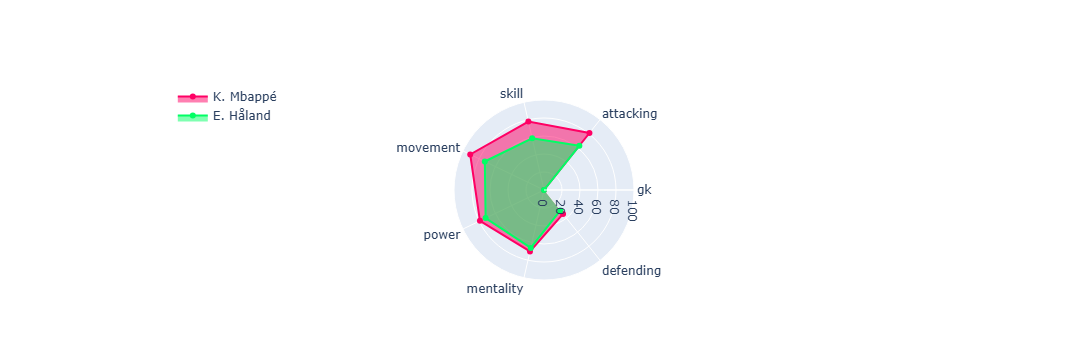

In [315]:
compare_players('K. Mbappé', 'E. Håland')

Kylian Mbappe and Erling Haaland are two of the youngest and brightest stars in the football world today. Mbappe, from France, is 20 years old, while Haaland, from Norway, is only 18 years old. Mbappe stands at 178cm and weighs 73kgs, while Haaland towers over him at 194cm and weighs 87kgs.

**Mbappe is faster and more agile**, with a pace score of 96 and an agility score of 92, compared to Haaland's pace score of 81 and agility score of 66. However, **Haaland is stronger**, with a strength score of 84 compared to Mbappe's score of 76. Both players have impressive dribbling and attacking skills, with Mbappe's dribbling score at 91 and Haaland's dribbling score at 72.

Mbappe is currently playing for Paris Saint-Germain, while Haaland was playing for FC Red Bull Salzburg in 2020 but currently playing for Manchester City. **Mbappe's value is currently at 93.5 million euros, with a wage of 155,000 euros, while Haaland's value is at 6.5 million euros, with a wage of 12,000 euros.** Despite the vast differences in their current values, both players have immense potential, with Mbappe having a potential score of 95, and Haaland having a potential score of 85.

#### What is ideal budget to create a competitive team?

Determining the ideal budget for a competitive FIFA team depends on a variety of factors such as the level of competition you are aiming for, the player ratings and attributes you are looking for, and the market conditions at the time of purchase.

However, a general rule of thumb is to allocate the majority of your budget towards key positions such as striker, central midfielder, and center back, as these positions tend to have the most impact on the game. You may also want to consider the depth of your squad, as injuries and suspensions can occur and having quality backups can be important.

We have already filtered out players with overall rating more than 65 so the team made up of these players would be competitive. 

- The overall budget to create a team would be sum of value of each player and the wage over the contract period. We will assume that each player is contracted for 5 years. Football team usually main playing 11 and secondary playing 11 which is also term as Depth of the team in football world. Hence, general strength of a football team is 22 players.

So, to find out the budget for the team, we have to consder the transfer amount (value_eur) and the weekly wage paid over the period of 5 years for each player.

If I were a football manager, my favourite team formation would be 4-3-3. So the players will play in following positions:
                            
                     |_____________|       
                            GK
                RB      CB      CB      LB

                            CDM

                        RDM     LDM

                    RW      CF      LW
                      _____________
                    

In [317]:
team_positions = ['GK', 'RB', 'CB', 'LB', 'CDM', 'RDM', 'LDM', 'RW', 'CF', 'LW']

# first find out the average value and wage of player playing in each position in the team
avg_value= fifa.groupby('team_position')['value_eur'].mean().reset_index()
avg_wage= fifa.groupby('team_position')['wage_eur'].mean().reset_index()

avg_value_team= avg_value[avg_value['team_position'].isin(team_positions)]
avg_wage_team= avg_wage[avg_wage['team_position'].isin(team_positions)]

# budget: 2 *(value of main playing 11 + 4*12*5* weekly salaray)
budget_11= 2* (avg_value_team['value_eur'].sum() + 4 * 12 * 5* avg_wage_team['wage_eur'].sum()+ avg_value_team.loc[1, 'value_eur'] + 4 * 12 * 5 * avg_wage_team.loc[1, 'wage_eur'])/1000000
print('The average budget to form a competitive football team is', np.ceil(budget_11), 'million euros')

The average budget to form a competitive football team is 198.0 million euros


## Data Preprocessing

In [320]:
# checking the information about data
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [321]:
# showing the data 
fifa.head()

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   
4          E. Hazard   28        175         74     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   
2          LW, CAM          Right                         5          5   
3               GK          Right                         3          3   
4           LW, CF          Right                         4          4   

   skill_moves      work_rate  release_clause_eur team_position  pace  \
0            4     Medium/Low         195800000.0            RW  87.0   
1            5       High/Low          96500000.0            LW  90.0   
2            5    High/Medium         195200000.0           CAM  91.0   
3            1  Medium/Medium         164700000.0            GK   NaN   
4            4    High/Medium         184500000.0            LW  91.0   

   shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0      92.0     92.0       96.0       39.0    66.0        NaN          NaN   
1      93.0     82.0       89.0       35.0    78.0        NaN          NaN   
2      85.0     87.0       95.0       32.0    58.0        NaN          NaN   
3       NaN      NaN        NaN        NaN     NaN       87.0         92.0   
4      83.0     86.0       94.0       35.0    66.0        NaN          NaN   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         NaN          NaN       NaN             NaN                  88   
1         NaN          NaN       NaN             NaN                  84   
2         NaN          NaN       NaN             NaN                  87   
3        78.0         89.0      52.0            90.0                  13   
4         NaN          NaN       NaN             NaN                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84     

In [322]:
# getting the shape of dataset (rows, cols)
fifa.shape

(18278, 90)

#### Dealing with Null Values

In [324]:
# checking the Null values in dataset
fifa.isnull().sum().sort_values(ascending=False)/fifa.shape[0] * 100


gk_kicking            88.860926
gk_diving             88.860926
gk_handling           88.860926
gk_reflexes           88.860926
gk_speed              88.860926
                        ...    
skill_long_passing     0.000000
skill_fk_accuracy      0.000000
skill_curve            0.000000
skill_dribbling        0.000000
power_shot_power       0.000000
Length: 90, dtype: float64

In [325]:
# players positions attributes apart from goal keeperes are null values & vise versa
gk_attribute_cols= ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
fifa[gk_attribute_cols]=fifa[gk_attribute_cols].fillna(0)
fifa[fifa['team_position']=='GK'].head(3)


short_name  age  height_cm  weight_kg nationality             club  \
3        J. Oblak   26        188         87    Slovenia  Atlético Madrid   
6   M. ter Stegen   27        187         85     Germany     FC Barcelona   
13        Alisson   26        191         91      Brazil        Liverpool   

    overall  potential  value_eur  wage_eur player_positions preferred_foot  \
3        91         93   77500000    125000               GK          Right   
6        90         93   67500000    250000               GK          Right   
13       89         91   58000000    155000               GK          Right   

    international_reputation  weak_foot  skill_moves      work_rate  \
3                          3          3            1  Medium/Medium   
6                          3          4            1  Medium/Medium   
13                         3          3            1  Medium/Medium   

    release_clause_eur team_position  pace  shooting  passing  dribbling  \
3          164700000.0            GK   NaN       NaN      NaN        NaN   
6          143400000.0            GK   NaN       NaN      NaN        NaN   
13         111700000.0            GK   NaN       NaN      NaN        NaN   

    defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
3         NaN     NaN       87.0         92.0        78.0         89.0   
6         NaN     NaN       88.0         85.0        88.0         90.0   
13        NaN     NaN       85.0         84.0        85.0         89.0   

    gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
3       52.0            90.0                  13                   11   
6       45.0            88.0                  18                   14   
13      51.0            90.0                  17                   13   

    attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
3                           15                       43                 13   
6                           11                       61                 14   
13                          19                       45                 20   

    skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
3                12           13                 14                  40   
6                21           18                 12                  63   
13               27           19                 18                  44   

    skill_ball_control  movement_acceleration  movement_sprint_speed  \
3                   30                     43                     60   
6                   30                     38                     50   
13                  30                     56                     47   

    movement_agility  movement_reactions  movement_balance  power_shot_power  \
3                 67                  88                49                59   
6                 37                  86                43                66   
13                40                  88                37                64   

    power_jumping  power_stamina  power_strength  power_long_shots  \
3              78             41              78                12   
6              79             35              78                10   
13             52             32              78                14   

    mentality_aggression  mentality_interceptions  mentality_positioning  \
3                     34                       19                     11   
6                     43                       22                     11   
13                    27                       11                     13   

    mentality_vision  mentality_penalties  mentality_composure  \
3                 65                   11                   68   
6                 70                   25                   70   
13                66                   23                   65   

    defending_marking  defending_standing_tackle  defending_sliding_tackle  \
3                  27                         12

In [326]:
# replacing the Null values of players attributes who are Not Goal Keepers
no_goalkeeper=['pace','shooting','passing','dribbling','defending','physic',
        'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
        'rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for index in fifa.index:
    if 'GK' in fifa.loc[index, 'player_positions']:
        for col in no_goalkeeper:
            if np.isnan(fifa.loc[index, col]):
                fifa.loc[index, col]=0
                
fifa[fifa['team_position']=='GK'].head()
                


short_name  age  height_cm  weight_kg nationality               club  \
3        J. Oblak   26        188         87    Slovenia    Atlético Madrid   
6   M. ter Stegen   27        187         85     Germany       FC Barcelona   
13        Alisson   26        191         91      Brazil          Liverpool   
14         De Gea   28        192         82       Spain  Manchester United   
25        Ederson   25        188         86      Brazil    Manchester City   

    overall  potential  value_eur  wage_eur player_positions preferred_foot  \
3        91         93   77500000    125000               GK          Right   
6        90         93   67500000    250000               GK          Right   
13       89         91   58000000    155000               GK          Right   
14       89         90   56000000    205000               GK          Right   
25       88         91   54500000    185000               GK           Left   

    international_reputation  weak_foot  skill_moves      work_rate  \
3                          3          3            1  Medium/Medium   
6                          3          4            1  Medium/Medium   
13                         3          3            1  Medium/Medium   
14                         4          3            1  Medium/Medium   
25                         2          3            1  Medium/Medium   

    release_clause_eur team_position  pace  shooting  passing  dribbling  \
3          164700000.0            GK   0.0       0.0      0.0        0.0   
6          143400000.0            GK   0.0       0.0      0.0        0.0   
13         111700000.0            GK   0.0       0.0      0.0        0.0   
14         110600000.0            GK   0.0       0.0      0.0        0.0   
25         104900000.0            GK   0.0       0.0      0.0        0.0   

    defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
3         0.0     0.0       87.0         92.0        78.0         89.0   
6         0.0     0.0       88.0         85.0        88.0         90.0   
13        0.0     0.0       85.0         84.0        85.0         89.0   
14        0.0     0.0       90.0         84.0        81.0         92.0   
25        0.0     0.0       86.0         82.0        93.0         88.0   

    gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
3       52.0            90.0                  13                   11   
6       45.0            88.0                  18                   14   
13      51.0            90.0                  17                   13   
14      58.0            85.0                  17                   13   
25      63.0            86.0                  20                   14   

    attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
3                           15                       43                 13   
6                           11                       61                 14   
13                          19                       45                 20   
14                          21                       50                 13   
25                          14                       56                 18   

    skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
3                12           13                 14                  40   
6                21           18                 12                  63   
13               27           19                 18                  44   
14               18           21                 19                  47   
25               23           15                 20                  58   

    skill_ball_control  movement_acceleration  movement_sprint_speed  \
3                   30                     43                     60   
6                   30                     38                     50   
13                  30                     56                     47   
14                  38                     57                     58   
25       

In [328]:
# checking the null values again to see how many got replaced
fifa.isnull().sum().sort_values(ascending=False)/fifa.shape[0] * 100


release_clause_eur    7.101433
team_position         1.313054
short_name            0.000000
lf                    0.000000
rs                    0.000000
                        ...   
gk_positioning        0.000000
gk_speed              0.000000
gk_reflexes           0.000000
gk_kicking            0.000000
rb                    0.000000
Length: 90, dtype: float64

#### Converting the DataType to INT

In [330]:
# fectch the data to know the formate of data in the dataset
fifa.iloc[:3,57:]

defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   
2                     9                   15                       15   

   goalkeeping_reflexes    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0                     8  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2   
1                    11  91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3   
2                    11  84+3  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0  93+2  93+2  92+2  87+2  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2   
1  88+3  88+3  88+3  81+3  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3   
2  90+3  90+3  89+3  82+3  82+3  82+3  89+3  66+3  61+3  61+3  61+3  66+3   

     lb   lcb    cb   rcb    rb  
0  63+2  52+2  52+2  52+2  63+2  
1  61+3  53+3  53+3  53+3  61+3  
2  61+3  46+3  46+3  46+3  61+3

In [333]:
# definig the funtion for typecasting
def str_to_int(x):
   '''
   Converts a string in the format of 'x+' to an integer.

    Args:
    x (str): A string in the format of 'x+', where x is an integer.

    Returns:
    int: The integer value of the string before the '+' sign.
    
    '''
   
   new= int(str(x).split('+')[0]) 

   return new

In [334]:
# columns to change the datatypes
columns= ['ls','st', 'rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in columns:
    fifa[col]=fifa[col].apply(str_to_int)

fifa.head(3)

short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   
2          LW, CAM          Right                         5          5   

   skill_moves    work_rate  release_clause_eur team_position  pace  shooting  \
0            4   Medium/Low         195800000.0            RW  87.0      92.0   
1            5     High/Low          96500000.0            LW  90.0      93.0   
2            5  High/Medium         195200000.0           CAM  91.0      85.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     92.0       96.0       39.0    66.0        0.0          0.0         0.0   
1     82.0       89.0       35.0    78.0        0.0          0.0         0.0   
2     87.0       95.0       32.0    58.0        0.0          0.0         0.0   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0          0.0       0.0             0.0                  88   
1          0.0       0.0             0.0                  84   
2          0.0       0.0             0.0                  87   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   

   defending_standing_tackle  defending_sliding_tackle  goal

#### Missing value Imputation

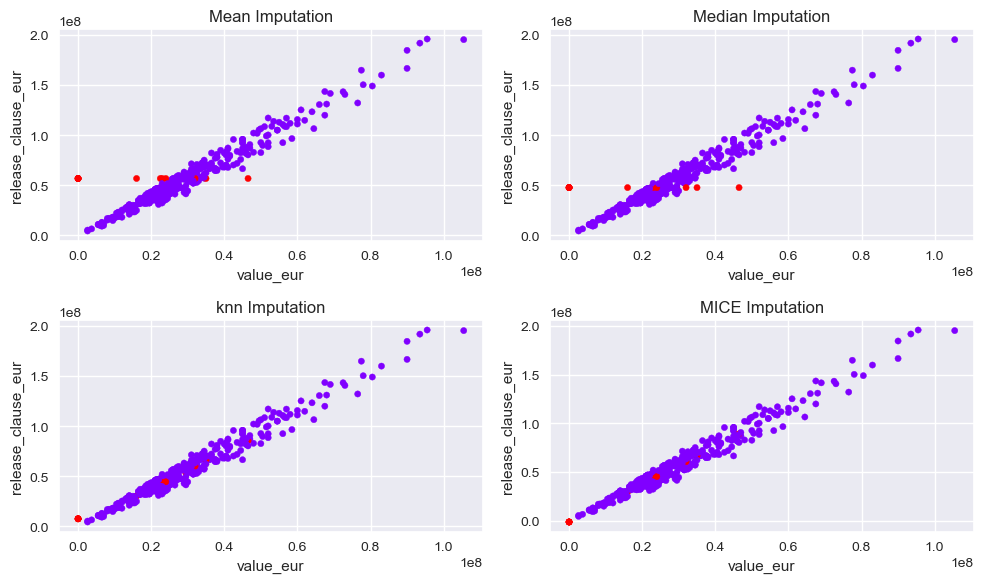

In [336]:
# filtering out numerical data
fifa_cat_list=list(train_fifa.select_dtypes('object').columns)
fifa_num=train_fifa.drop(columns=fifa_cat_list)

# mean imputation
df_mean = fifa_num.copy()
mean_imputer = SimpleImputer(strategy = "mean")
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

# median imputation
df_median =fifa_num.copy()
median_imputer = SimpleImputer(strategy = "median")
df_median.iloc[:,:] = median_imputer.fit_transform(df_median)

# KNN imputation
df_knn = fifa_num.copy()
knn_imputer = KNNImputer()
df_knn.iloc[:,:]= knn_imputer.fit_transform(df_knn)

# MICE(Multiple Imputation by Chained Equations) imputation
df_mice= fifa_num.copy()
mice_imputer = IterativeImputer()
df_mice.iloc[:,:]= mice_imputer.fit_transform(df_mice)

# let's analyse all above imputation results visually
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))

nullity = train_fifa["release_clause_eur"].isna()
imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn,
              "MICE Imputation": df_mice}

for ax, key in zip(ax.flatten(), imputations):
    
    imputations[key].plot(x = "value_eur", y = "release_clause_eur", kind="scatter", 
                             ax=ax, c=nullity, cmap="rainbow", title=key, colorbar=None)
    
    plt.tight_layout();

The graphs are plotted with Fare values on x-axis and Age on y-axis. Imputed values are represented by red dots. 
- **Mean and Median imputation techniques fill constant values so, we see the imputed missing values along the straight horizontal line.**
- **As KNN and MICE Imputation techniques are distance based, values are imputed based on nearest distance to the other observations. Hence, they give results close to the original data.** 

Both KNN and MICE show almost the same results. KNN imputation is typically faster and computationally less complex than MICE imputation, which involves multiple imputations and model fitting. KNN imputation involves calculating distances between observations and selecting the nearest neighbors for imputation, which is computationally less intensive. **Hence, we will go with KNN imputation.**

In [339]:
# Implemeting KNN Imutation
fifa_num_imputed=df_knn.copy()

## Feature Selection

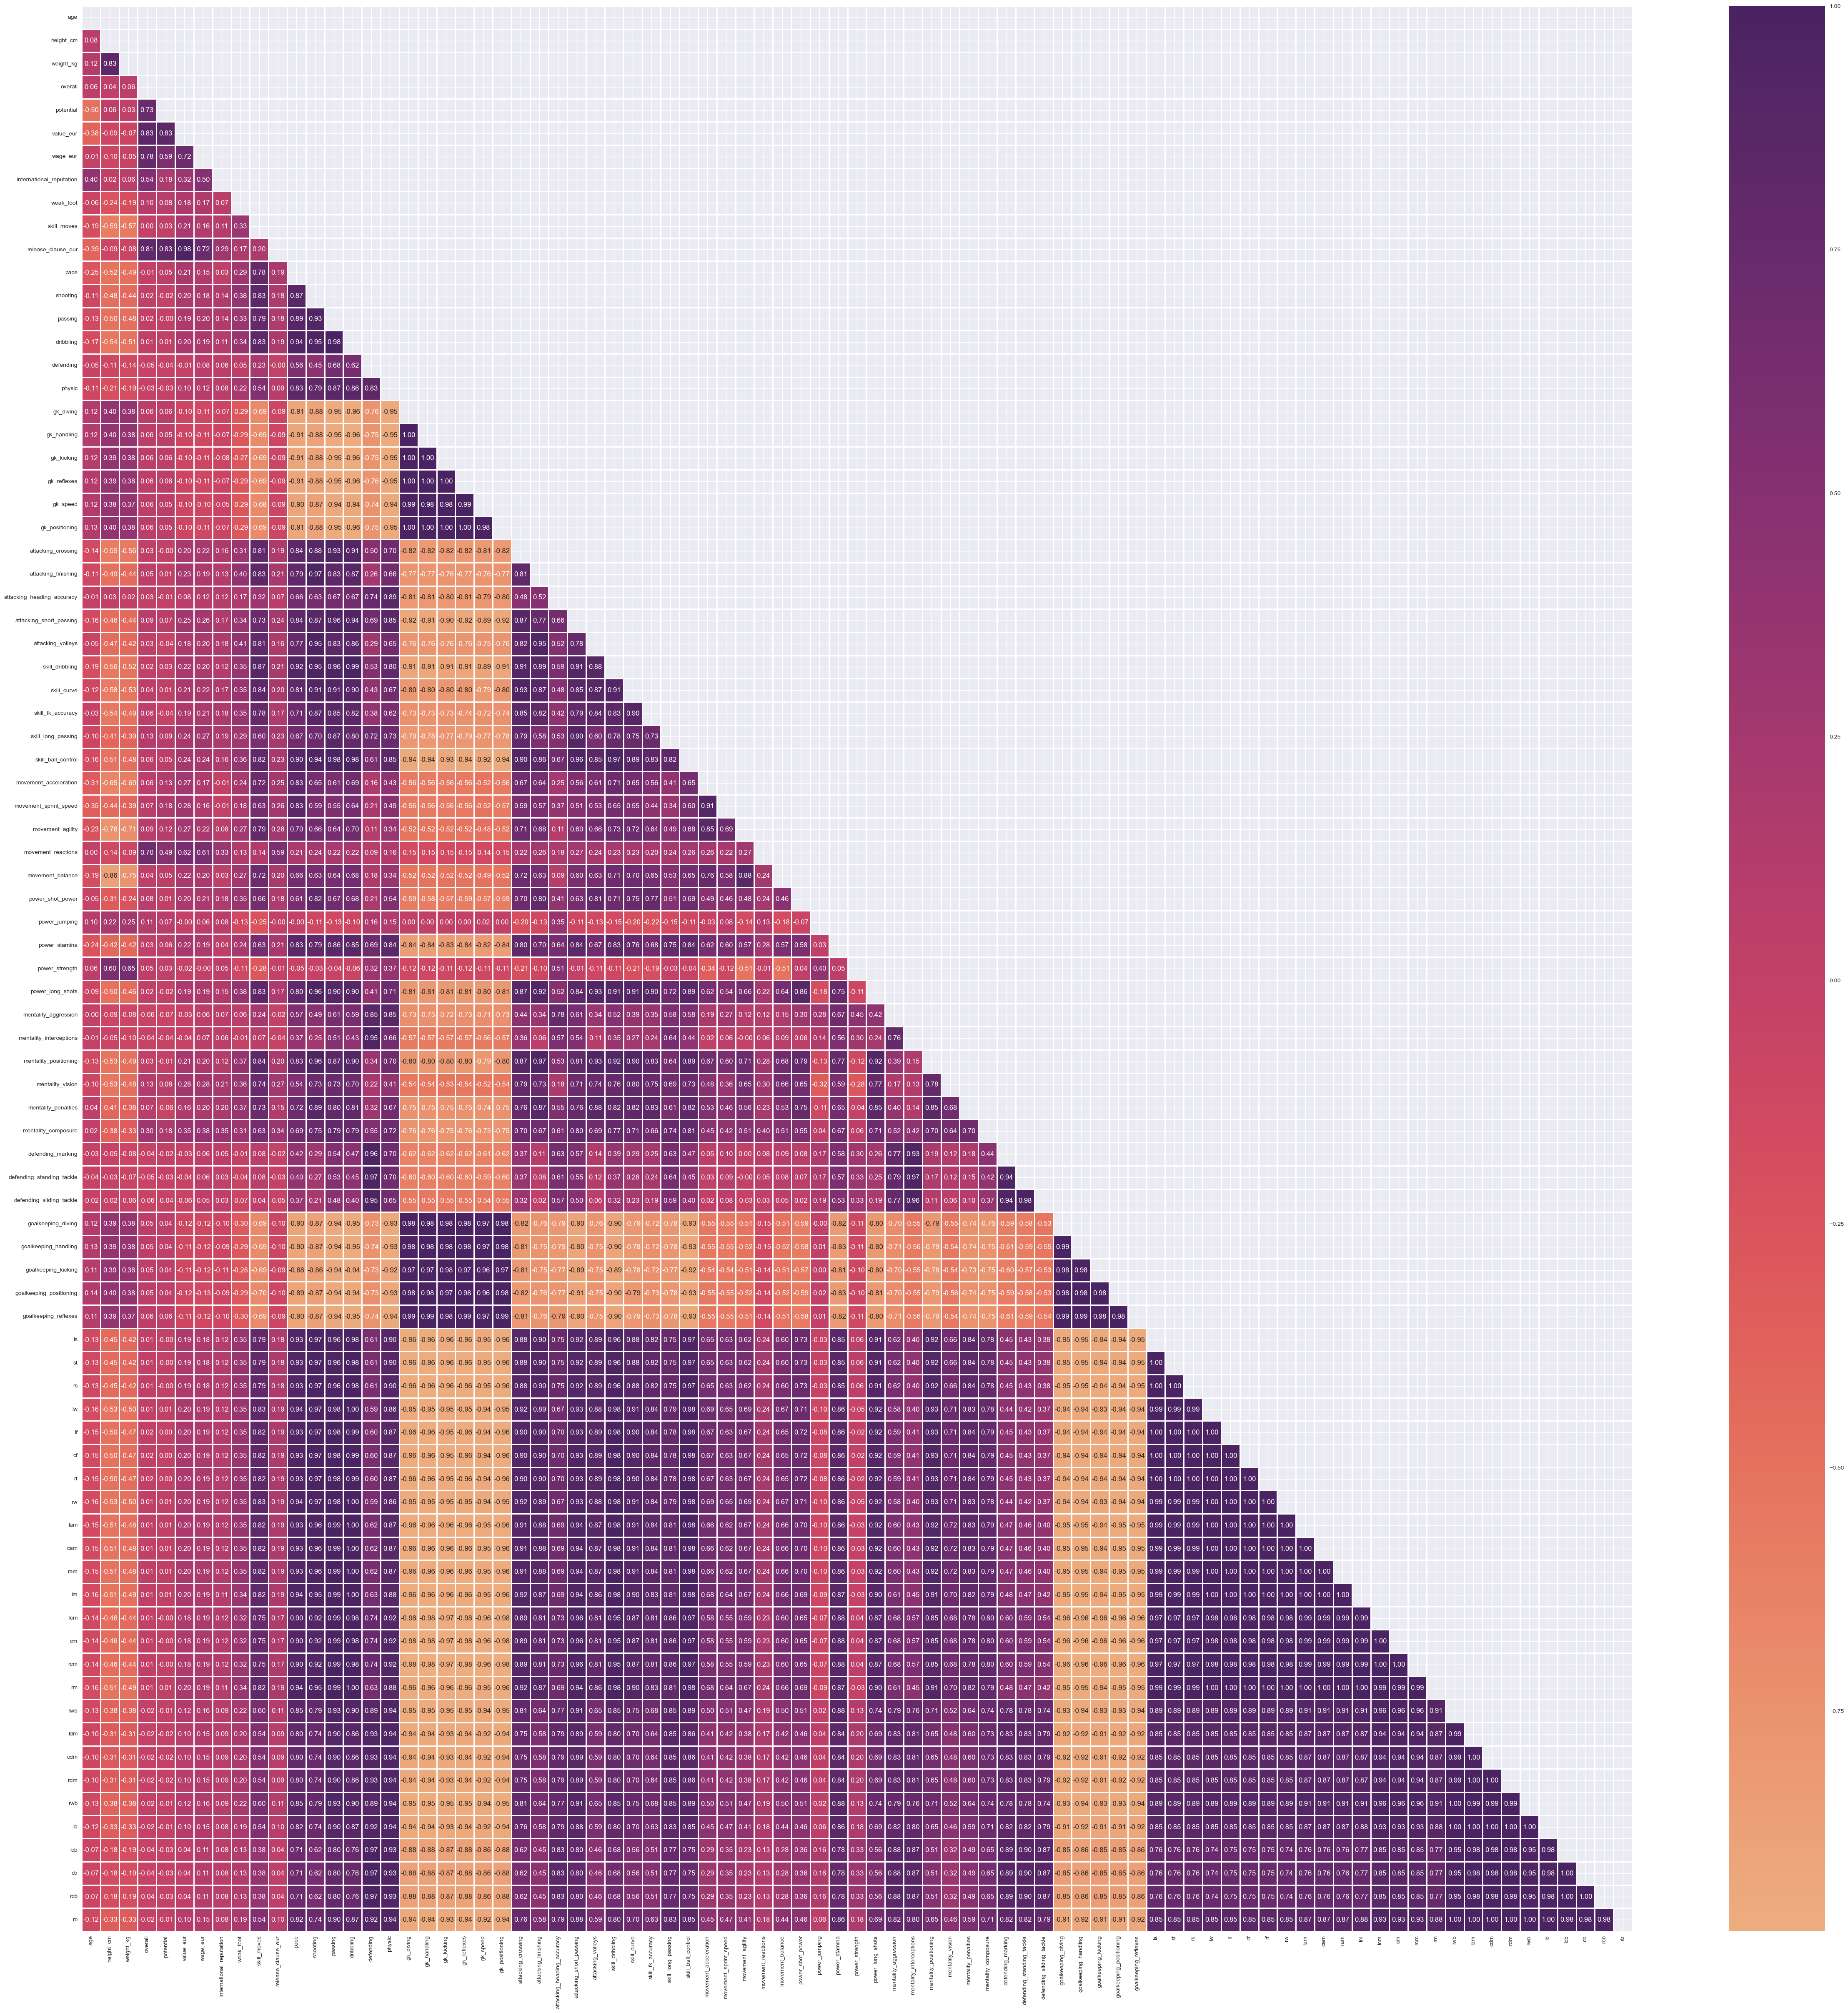

In [212]:
#correlation
corr= fifa_num_imputed.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

#heatmap
plt.figure(figsize=(60,60))
sns.heatmap(fifa_num_imputed.corr(), mask=mask, center=0, cmap='flare', linewidths=1, annot=True, fmt='.2f');

We can clearly see there are multiple attributes which are strongly correlated with each other. We will get rid of it as they are conveying same information as their related attributes. We have some valuable tools like PCA and t-SNE to reduce the dimension of the dataset and visualise the pattern in lower dimention. 

### Scaling

In [340]:
# scalling the data to bringing the data in range
scaler=StandardScaler()
fifa_scaled=scaler.fit_transform(fifa_num_imputed)

### PCA

- Principal Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of features in a dataset while preserving as much variance as possible.
- PCA achieves this by finding a new set of axes (called principal components) that are linear combinations of the original features.\
- Reduce dimensionality to improve model performance and visualization.
- Handle multicollinearity by transforming correlated features into uncorrelated principal components.
- Capture the most important information (variance) in the dataset.

In [344]:
pca=PCA()
fifa_pca=pca.fit_transform(fifa_scaled)
pca_comp=PCA(n_components=2)
fifa_pca=pca_comp.fit_transform(fifa_scaled)
#concatenating with original dataset
col_names=['PC1', 'PC2']
new_fifa=pd.concat([fifa_num_imputed.reset_index(drop=True), pd.DataFrame(fifa_pca, columns=col_names)], axis=1)
new_fifa['player_name']=players_data['short_name']
new_fifa.head(3)

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   

   international_reputation  weak_foot  skill_moves  release_clause_eur  pace  \
0                         5          4            4         195800000.0  87.0   
1                         5          4            5          96500000.0  90.0   
2                         5          5            5         195200000.0  91.0   

   shooting  passing  dribbling  defending  physic  gk_diving  gk_handling  \
0      92.0     92.0       96.0       39.0    66.0        0.0          0.0   
1      93.0     82.0       89.0       35.0    78.0        0.0          0.0   
2      85.0     87.0       95.0       32.0    58.0        0.0          0.0   

   gk_kicking  gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0         0.0          0.0       0.0             0.0                  88   
1         0.0          0.0       0.0             0.0                  84   
2         0.0          0.0       0.0             0.0                  87   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   
2      

### t-SNE
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that is commonly used for visualizing high-dimensional data in a low-dimensional space. It is particularly useful when dealing with complex datasets that cannot be easily visualized in 2D or 3D space. t-SNE works by modeling the similarity between data points in the high-dimensional space and attempting to preserve this similarity in the low-dimensional space.

In this project, t-SNE can be used as a dimensionality reduction technique to visualize the high-dimensional data of FIFA players in a two-dimensional or three-dimensional space. It can help us to see how similar or dissimilar the players are based on their attributes. t-SNE can also help us to identify any clusters or patterns that exist within the dataset, which could be useful to gain valuable insights into the FIFA data and make data-driven decisions to improve the game.

Before plotting clusters, lets create a function to categorize the FIFA player positions listed in the team_position column into five major categories: Striker, Midfielder, Defender, Goalkeeper, and Unknown.

This is helpful because these categories are more informative for analysis than the raw position strings.

In [347]:
def get_position(x):

    if x=='Not Given' or x=='RES' or x=='SUB':
        return 'Unknown'
    elif x in ['RW', 'LW', 'CAM', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']: 
        return 'Striker'
    elif x in ['RCM', 'CDM', 'LDM', 'RM','LCM', 'LM', 'RDM','RAM', 'CM', 'LAM']:
        return 'Midfielder'
    elif x in ['LCB','RCB', 'LB', 'RB', 'CB', 'RWB','LWB']:
        return 'Defender'
    elif x=='GK':
        return 'Goalkeeper'

fifa['position']=fifa['team_position'].apply(get_position)

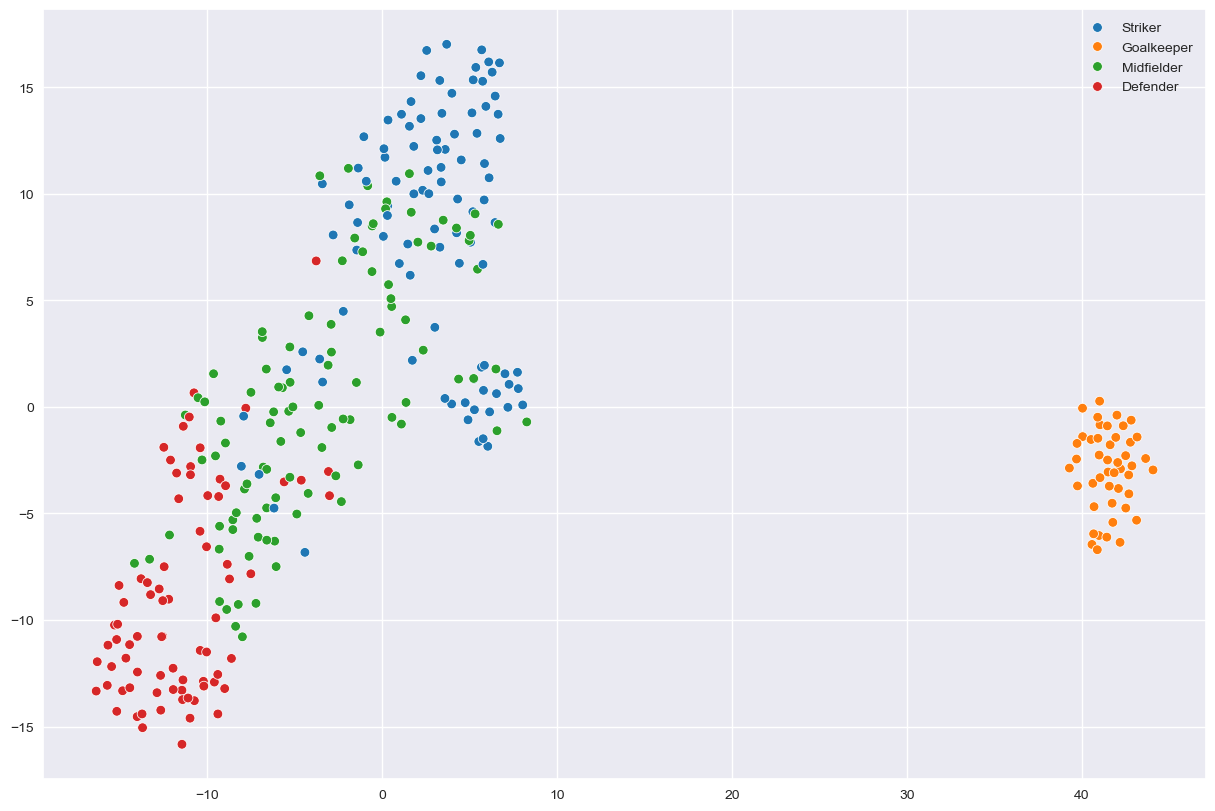

In [350]:
'''
For better visualisation, we will plot tsne plot for player with overall rating over 80 
and drop players with Unknown playing postion.
'''
tsne_fifa= fifa[(fifa['position']!='Unknown') & (fifa['overall']>80)]

# filtering out numerical data
tsne_fifa_cat_list = list(tsne_fifa.select_dtypes('object').columns)
tsne_fifa_num = tsne_fifa.select_dtypes(include=['float', 'int'])

# impute missing values
tsne_fifa_num.loc[:, :] = knn_imputer.transform(tsne_fifa_num)

# standardize data
tsne_scaler = StandardScaler()
tsne_data_scaled = tsne_scaler.fit_transform(tsne_fifa_num)

# fit t-SNE model and plot results
model = TSNE(learning_rate=20)
transformed = model.fit_transform(tsne_data_scaled)
xs = transformed[:,0]
ys = transformed[:,1]
plt.figure(figsize=(15,10))
sns.scatterplot(x=xs,y=ys, hue=tsne_fifa['position'].values, palette='tab10');

- We can observe that the clustering was done based on the playing position of players. There are two main clusters: Goalkeepers and Other players.
- Goalkeepers are shown in orange color and grouped on the right most side while other players are grouped on left side
- If we zoom into players who are not Goalkeepers, players who plays in advanced position are on the top part of the plot, whereas the defenders are on the botton part
- Players who like to play in the middle and dictate the play are grouped in the middle. 
- Ofcourse, the clustering is not 100% accurate as we can see some overlapping. We believe, it may be again because of the playing style and attributes of players.
    -  For example, defender like Sergio Ramos who is more aggressive and likes to play in advance position more often, has higher attacking attributes than other defenders. Such defensive players might be plotted higher in the plot.

### K-Means

- K-Means is a clustering algorithm used to partition data into k clusters based on feature similarity.
- It minimizes the sum of squared distances between data points and their corresponding cluster centroids.

In the next part, we will be performing the "Elbow Method" to determine the optimal number of clusters for KMeans clustering. The Elbow Method is a graphical technique used to select the number of clusters by observing the relationship between the number of clusters and the Within-Cluster-Sum-of-Squares (WCSS) value.

We will iterate over a range of values for k (the number of clusters) and calculate the WCSS value for each k using KMeans clustering. We will then plot the WCSS values against the number of clusters, and look for a point in the plot where the decrease in WCSS begins to level off. This point is referred to as the "Elbow Point", and it indicates the optimal number of clusters for the dataset.

We will also add vertical lines on the plot to help visualize the Elbow Point, and annotate the plot to indicate the Elbow Region. By using the Elbow Method, we can choose the optimal number of clusters for our KMeans clustering algorithm, and use it to cluster FIFA players based on their attributes and positions.

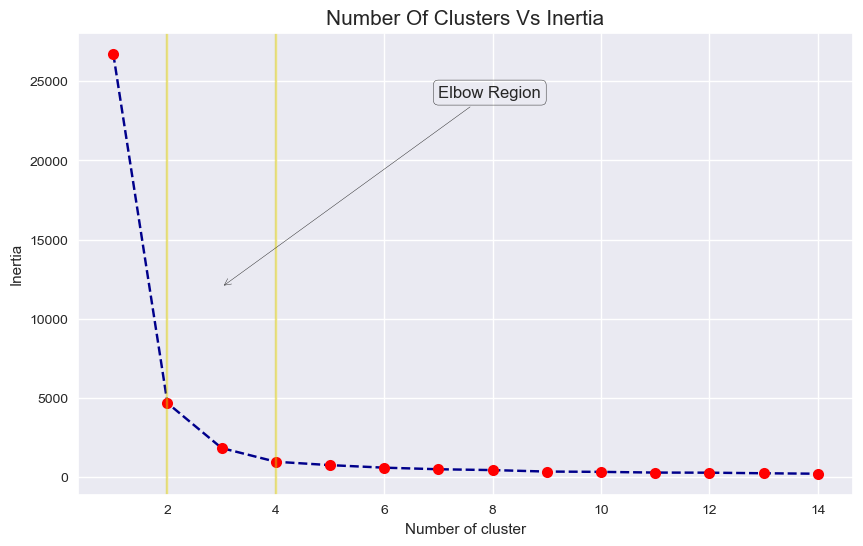

In [352]:
wcss=[]

for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(fifa_pca)
    inertia=kmeans.inertia_
    wcss.append(inertia)

#plotting graph
plt.figure(figsize=(10,6))
plt.plot(range(1,15), wcss, color='darkblue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.axvline(2, alpha=0.5, color='y')
plt.axvline(4, alpha=0.5, color='y')
plt.annotate('Elbow Region', (3, 12000), (7, 24000),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Number of clusters vs Inertia'.title(), fontsize=15);

Similar to the above plot we can also visualise optimum value of clusters using the KElbowVisualizer from the yellowbrick library. The plot shows the relationship between the number of clusters and the within-cluster sum of squares (inertia) of the data. The optimal number of clusters is where the decrease in inertia starts to slow down and forms an elbow shape in the plot.

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

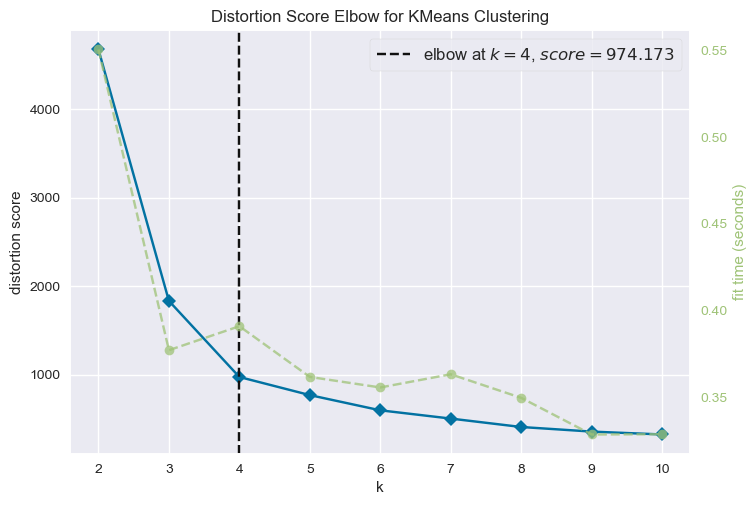

In [353]:
visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

visualizer3.fit(fifa_pca) # Fit the data to the visualizer
visualizer3.show(outpath='elbowplot2.png')

We have got a visual where Elbow can be. The bend occurs at clusters 2. But the wcss becomes more stable after clusters 4. Although, this plot gives us better understanding of what number of clusters are suitble for the dataset, we will still try out model with 2, 3 and 4 clusters respectively. To avoid repeating the code, we will create a function which takes number of clusters as argument and returns us the clustered plot. It is as follows:

In [355]:
def plot_clusters(num_clusters):

    """
    Plot clusters of FIFA player data using KMeans clustering algorithm.

    Parameters:
    num_clusters (int): Number of clusters to use for KMeans clustering.

    """
    kmeans2=KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans2.fit(fifa_pca)
    #Adding labels to new_fifa dataframe
    new_fifa['labels']=kmeans2.labels_

    sub_data=new_fifa[new_fifa['overall']>80]
    plt.figure(figsize=(20,15))
    sns.scatterplot(x='PC1', y='PC2', hue='labels', palette='tab10', data=sub_data)

    for index, row in new_fifa.iterrows():
        if row['overall']>85:
            plt.annotate(row['player_name'], xy=(row['PC1'], row['PC2']), xytext=(row['PC1']+1, row['PC2']+1), textcoords='offset points',
                ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7), 
                arrowprops=None)

For n_clusters = 2 The average silhouette_score is : 0.8205592508416955
For n_clusters = 3 The average silhouette_score is : 0.5741531227815672
For n_clusters = 4 The average silhouette_score is : 0.5659393303801896
For n_clusters = 5 The average silhouette_score is : 0.5036588376220905
For n_clusters = 6 The average silhouette_score is : 0.5208193080655762


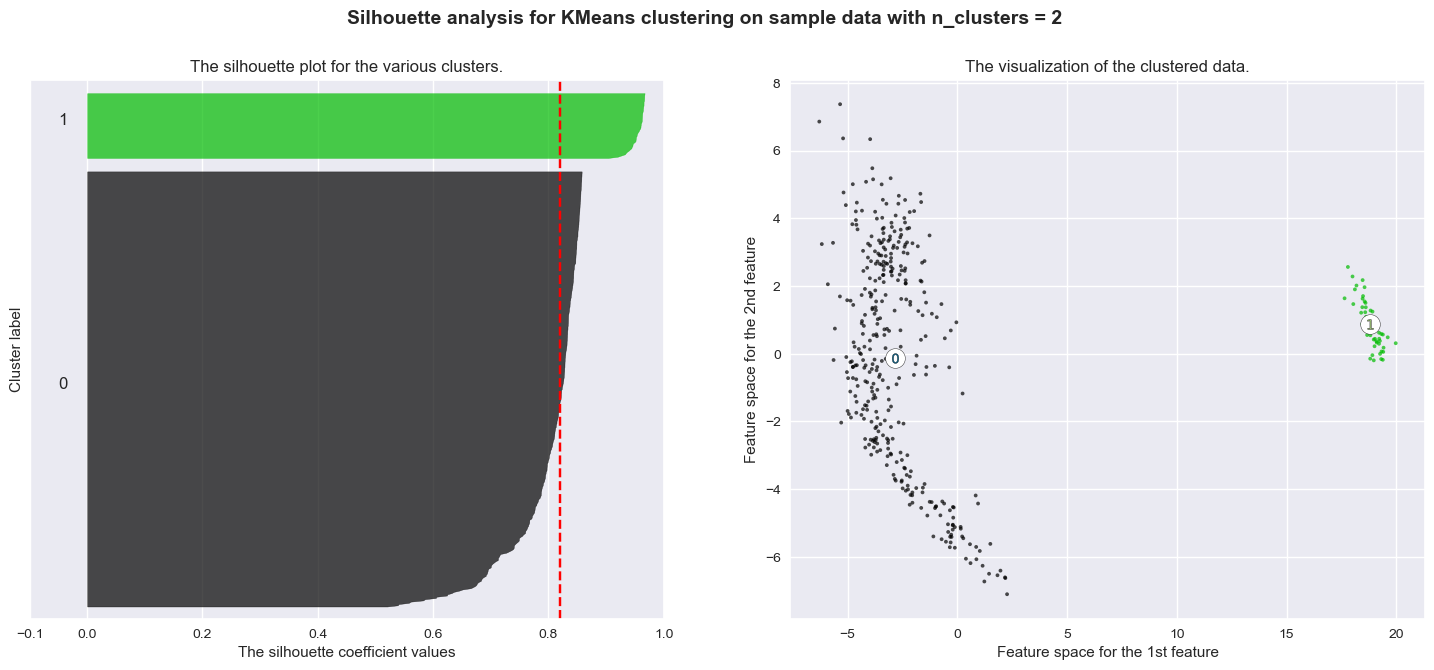

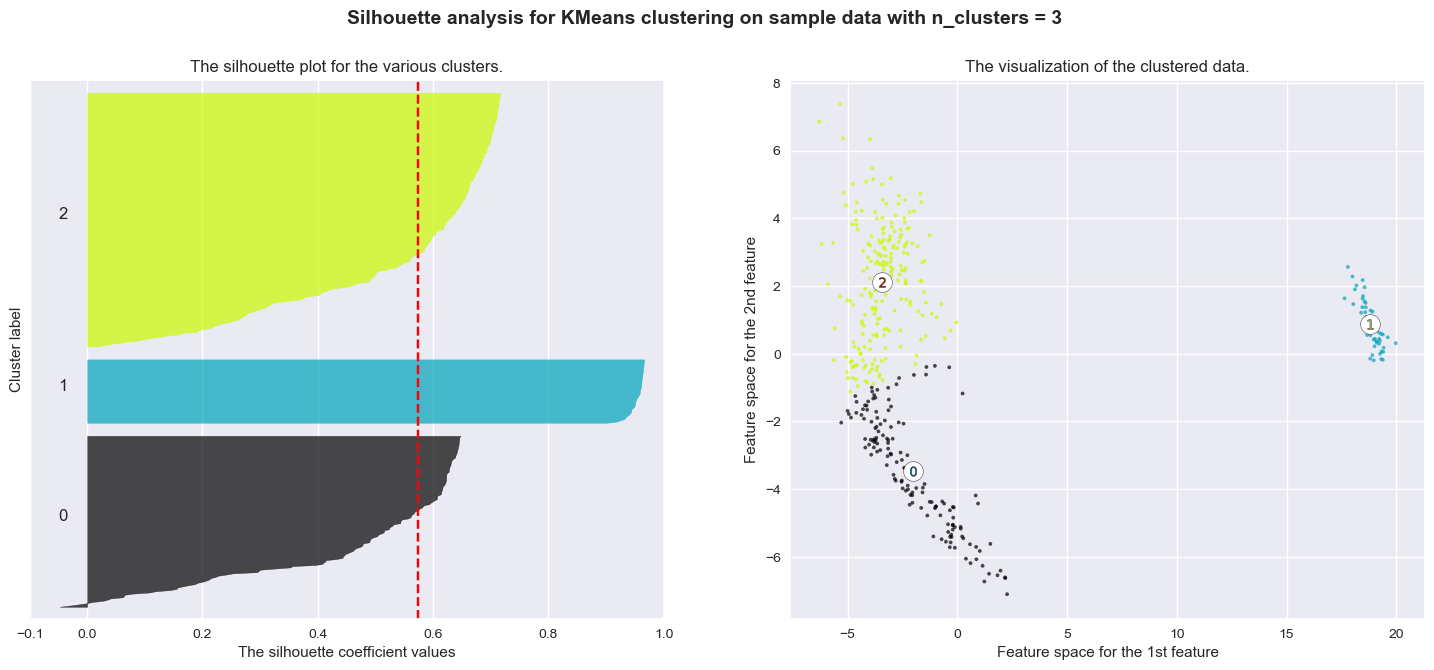

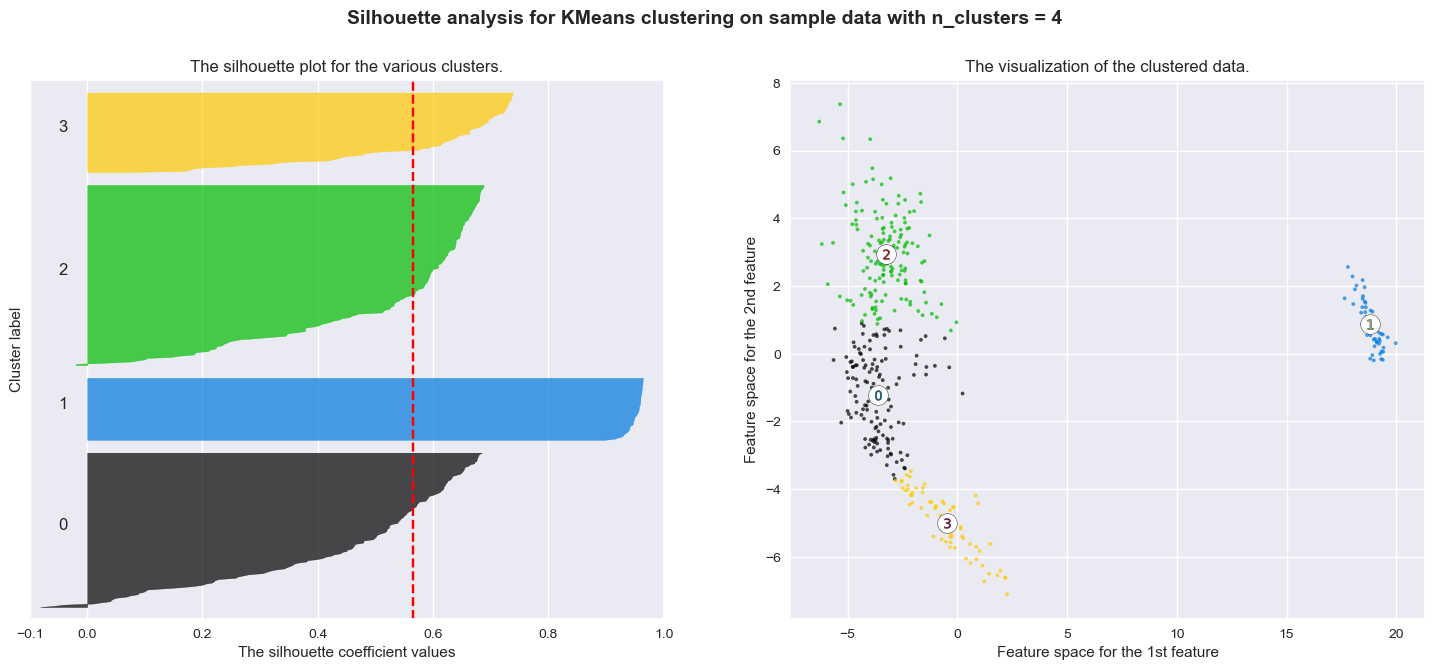

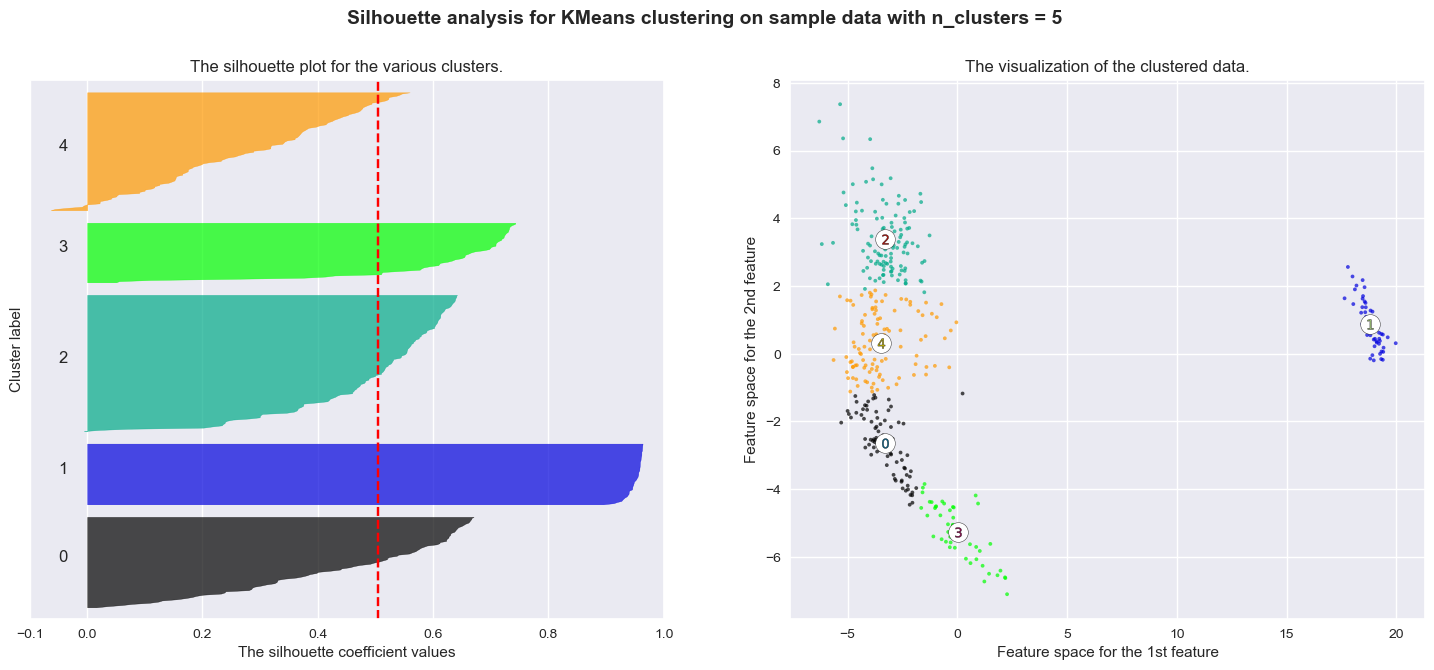

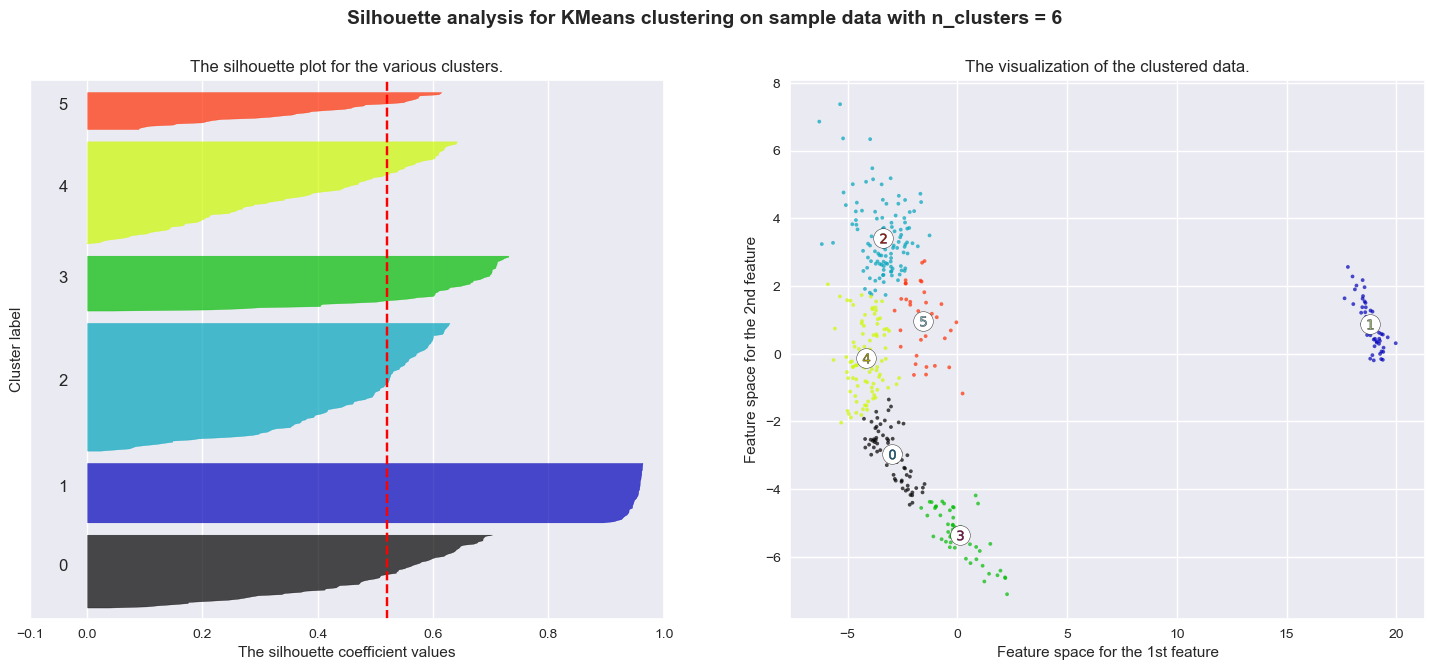

In [356]:
range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(fifa_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(fifa_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(fifa_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fifa_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    new_fifa['PC1'], new_fifa['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

From the silhouette scores obtained for different values of n_clusters, we can observe that the clustering with 2 clusters has the highest silhouette score of 0.82, indicating that the data points are well matched to their own clusters and poorly matched to neighboring clusters. On the other hand, the clustering with 3 or more clusters has lower silhouette scores, indicating that the data points are overlapping or are not well-matched to their own clusters.

It is important to note that the silhouette score alone may not provide a complete picture of the quality of the clustering. In some cases, a lower silhouette score may still correspond to good clustering, especially when the clusters are well-separated and clearly distinct from each other.

In the current case, the silhouette score for 4 clusters is relatively low at 0.56, but the clustering appears to be good from the visualization of the data points. This could be due to the fact that some of the clusters have a smaller number of data points, leading to lower silhouette scores. Additionally, the data points within a cluster may be more densely packed, resulting in a lower silhouette score, but still indicating good clustering

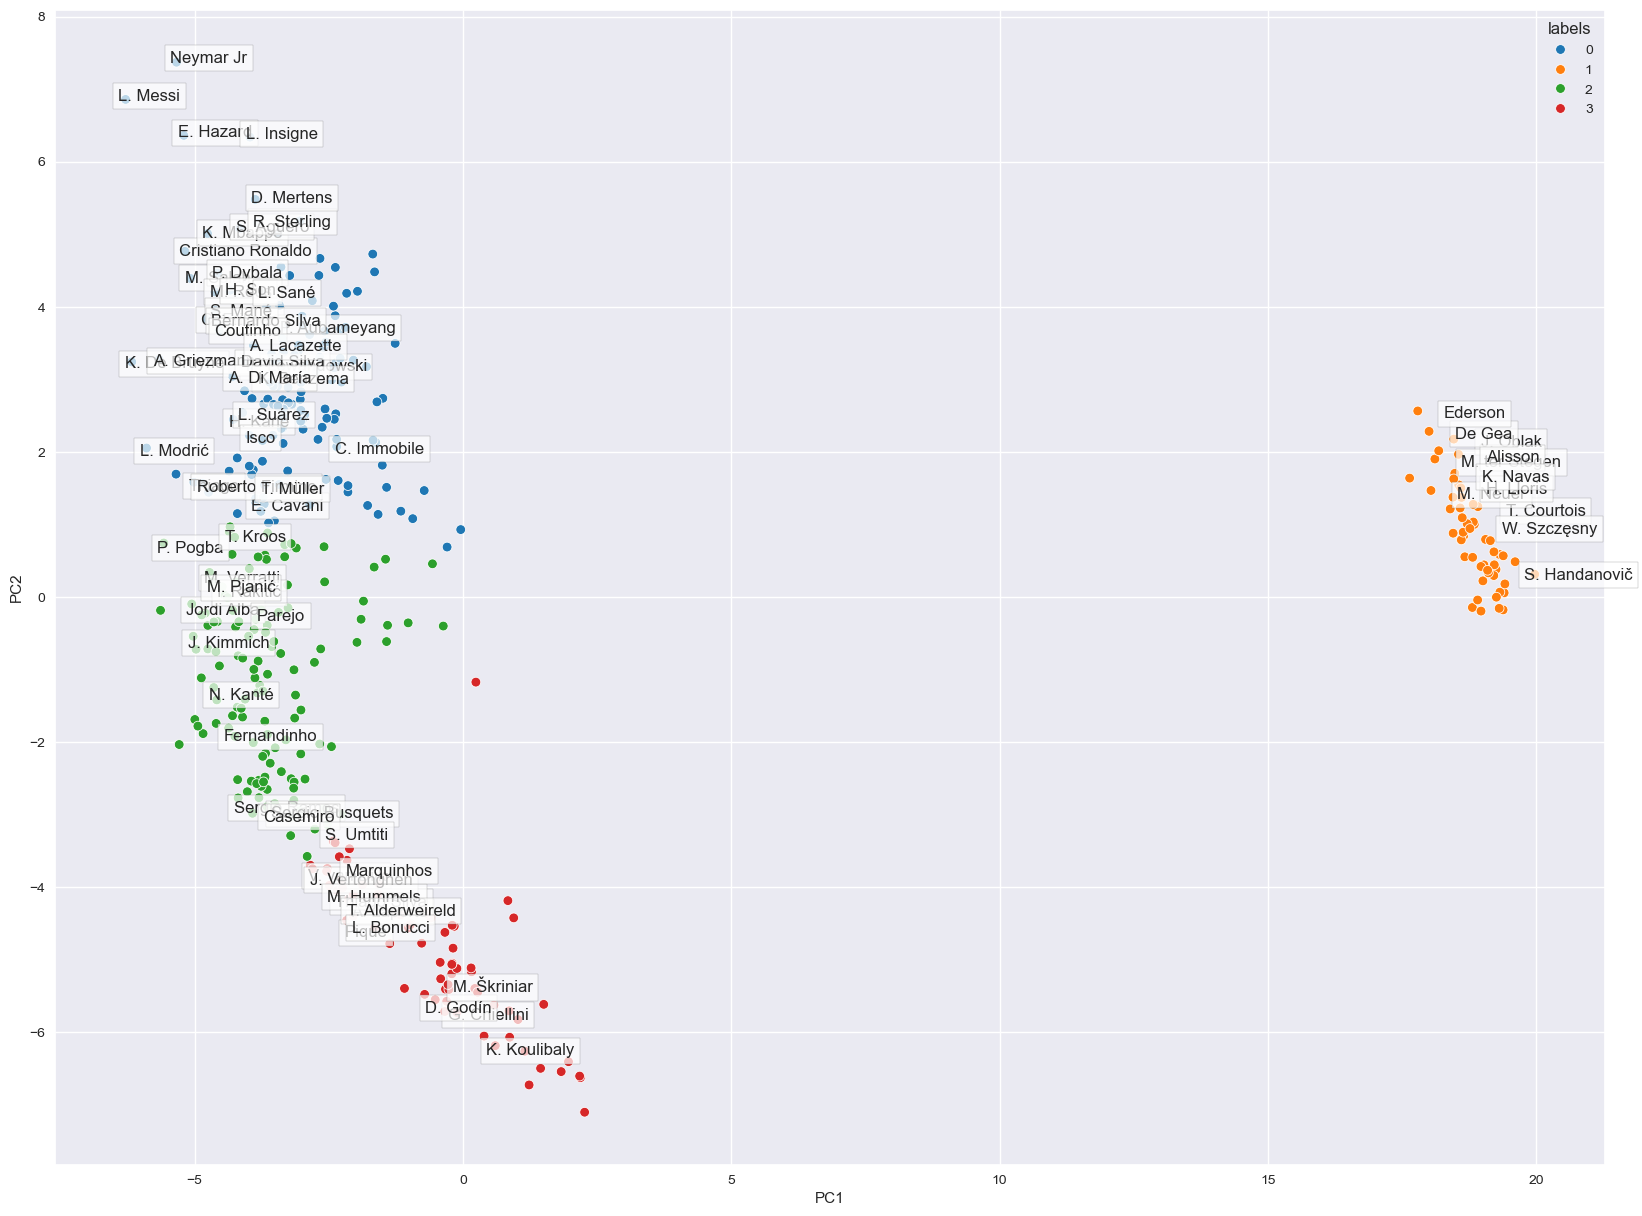

In [238]:
plot_clusters(4)

The model appears to be working well with 4 clusters. The clusters are distinguished with the help of colors. Upon analysing, we can observe following points:

- **Green** cluster represents likes to play in more **attacking players**, mostly strikers and attacking mid-fielders.
- **Red** cluster represents players likes playing in **center part of pitch** and create chances throught their passing abilities.
- **Orange** cluster represents **Defenders** protecting their goal.
- **Blue** cluster represents **Goalkeepers** standing like a wall to nullify any attempt of opposition to score goals.

### Hierarchical Clustering


Hierarchical clustering is a popular unsupervised learning technique used to group similar observations together. It is particularly useful in cases where there is no a priori knowledge of the number of clusters or where the data is expected to have a nested structure. In the FIFA project, hierarchical clustering can be used to group similar players based on their numerical attributes such as age, height, weight, overall rating, and so on. This can provide valuable insights into the characteristics of different player groups and help identify players with similar skillsets. The resulting clusters can also be used for player comparison, team formation, and scouting purposes.

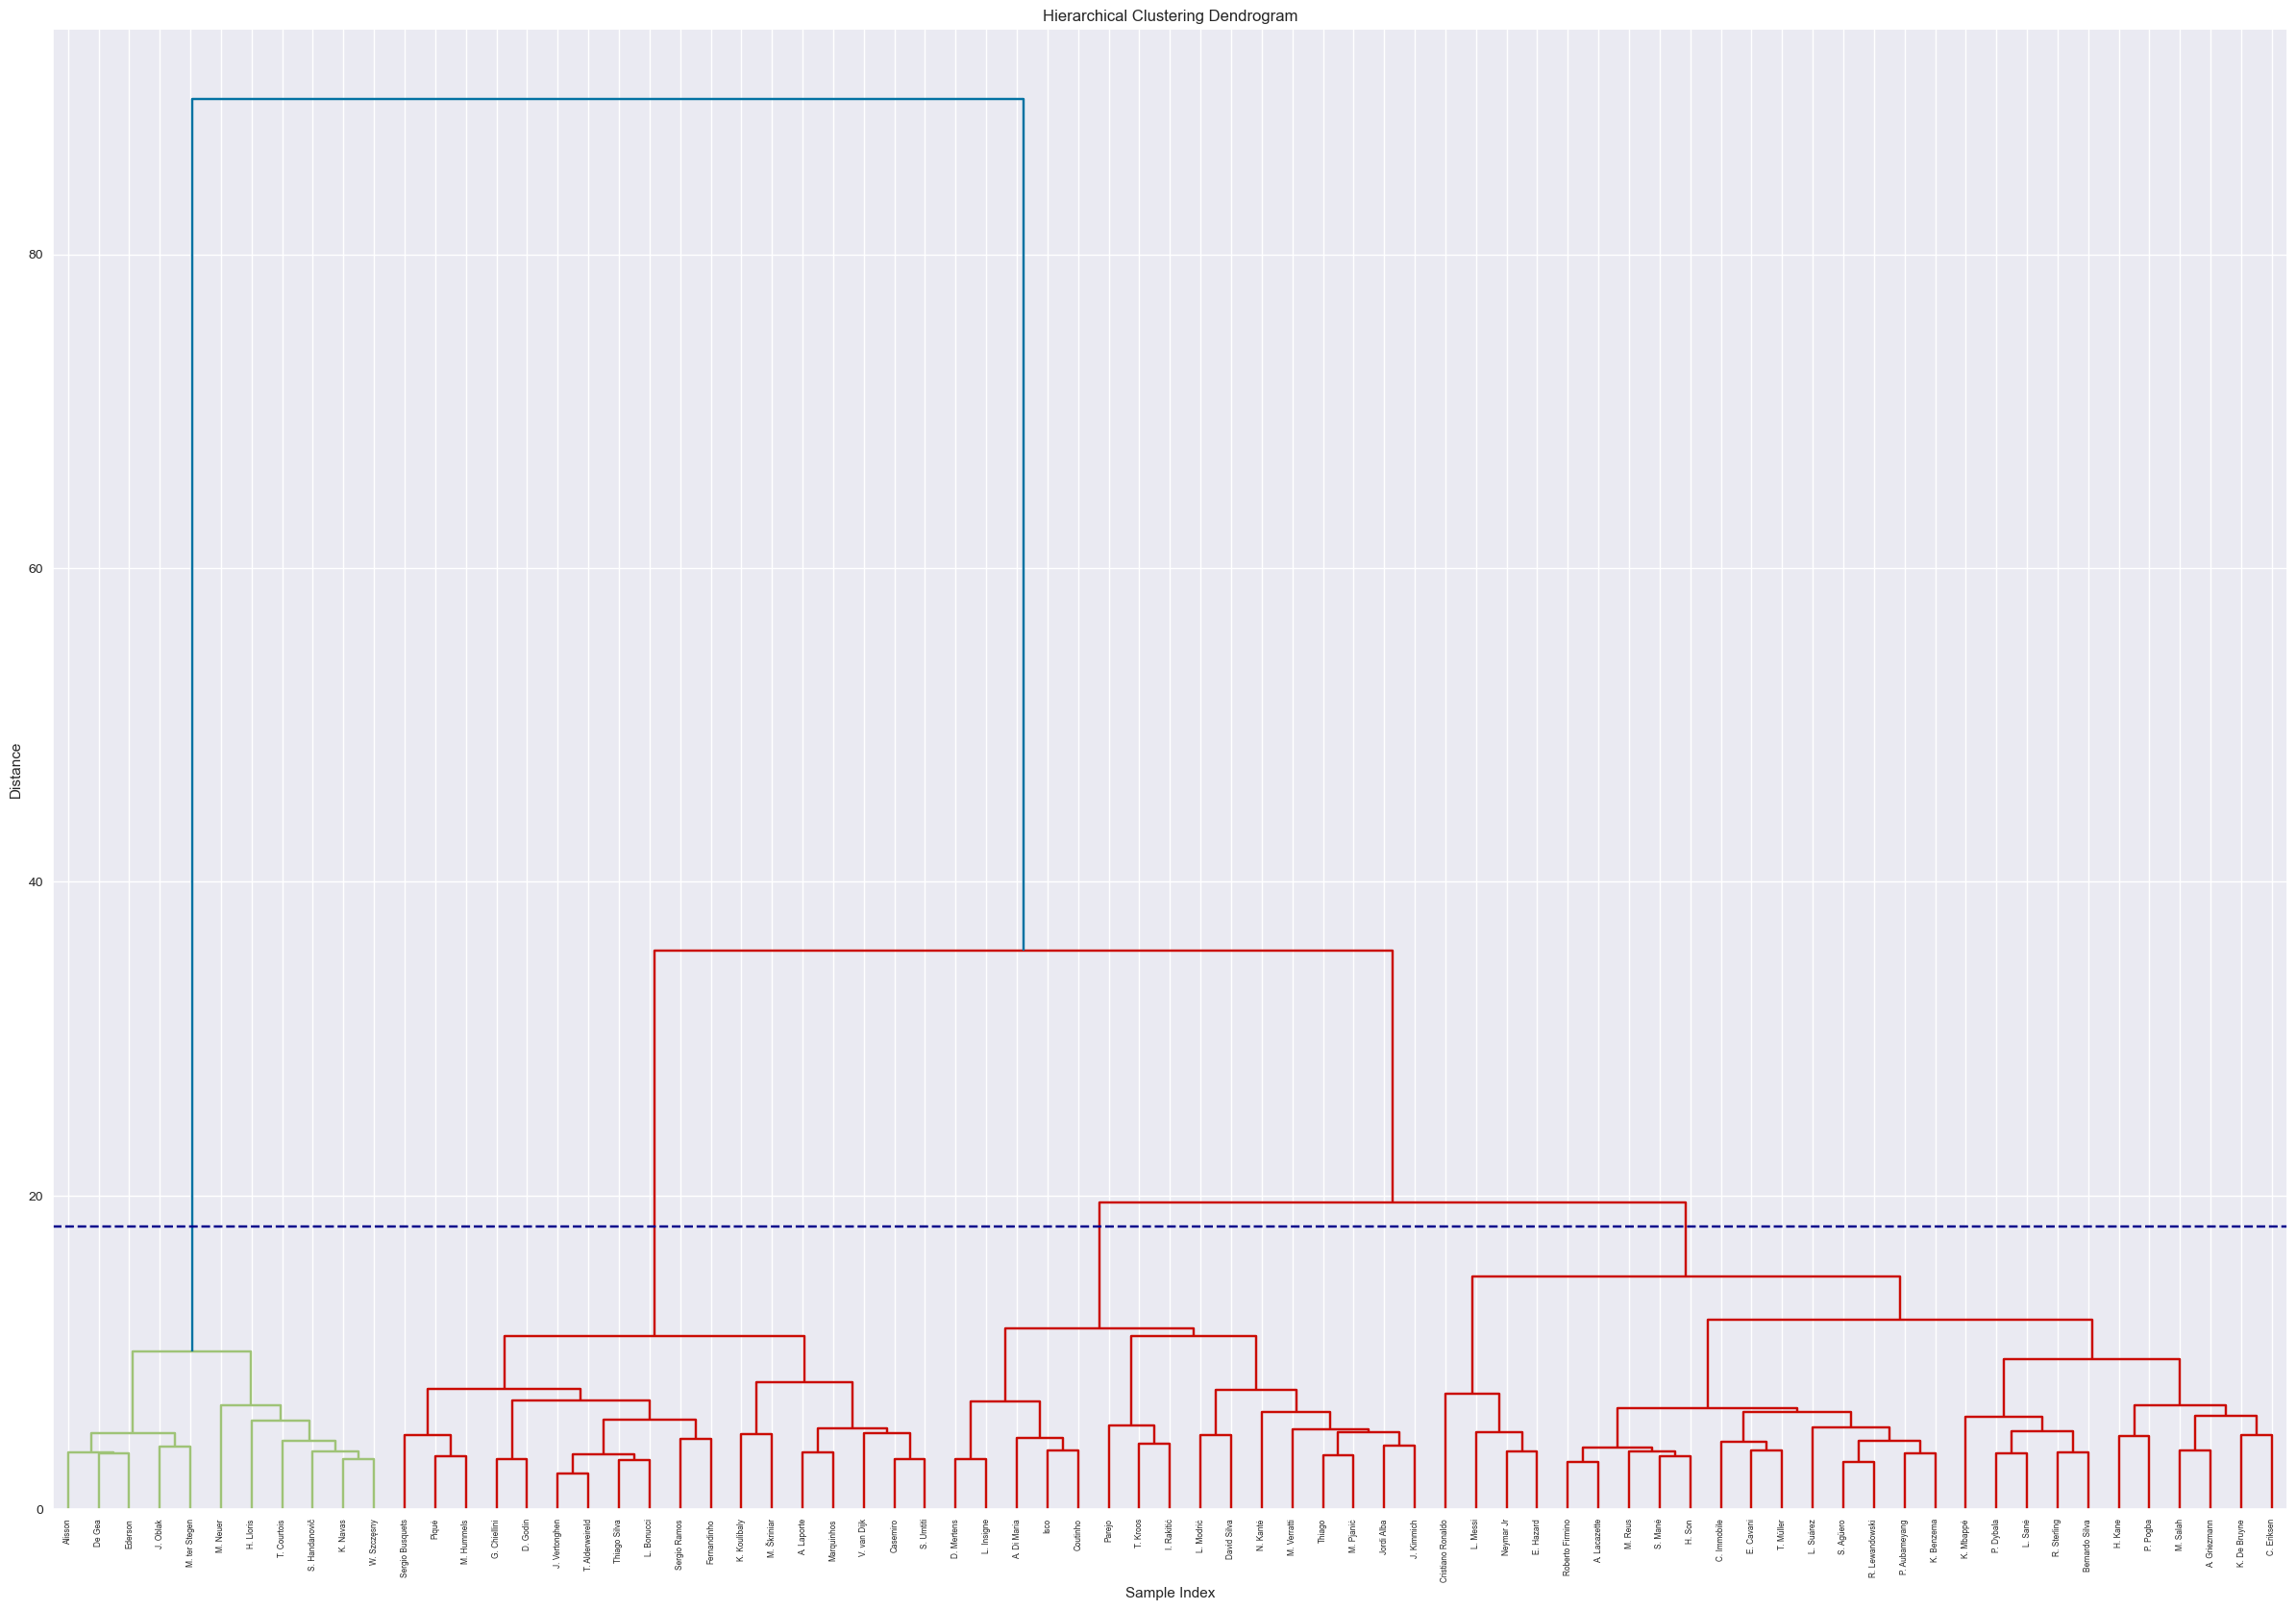

In [357]:
from scipy.cluster.hierarchy import dendrogram, linkage

X= fifa_num_imputed.copy()
X=X[X['overall']>85]

y=train_fifa[train_fifa['overall']>85]['short_name'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the linkage matrix using Ward's method
mergings = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(30, 20))
dendrogram(mergings,leaf_rotation=90, leaf_font_size=6, labels=y)
plt.title("Hierarchical Clustering Dendrogram")
plt.axhline(18, linestyle='--', color='darkblue')
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [365]:
labels = fcluster(mergings, 18, criterion='distance')

#PCA
hier_pca= PCA(n_components=2)
X_pca= hier_pca.fit_transform(X_scaled)
#concatenating with original dataset
col_names=['PC1', 'PC2']
X_new=pd.concat([X.reset_index(drop=True), pd.DataFrame(X_pca, columns=col_names)], axis=1)
X_new['player_name']=y
X_new['labels']=labels


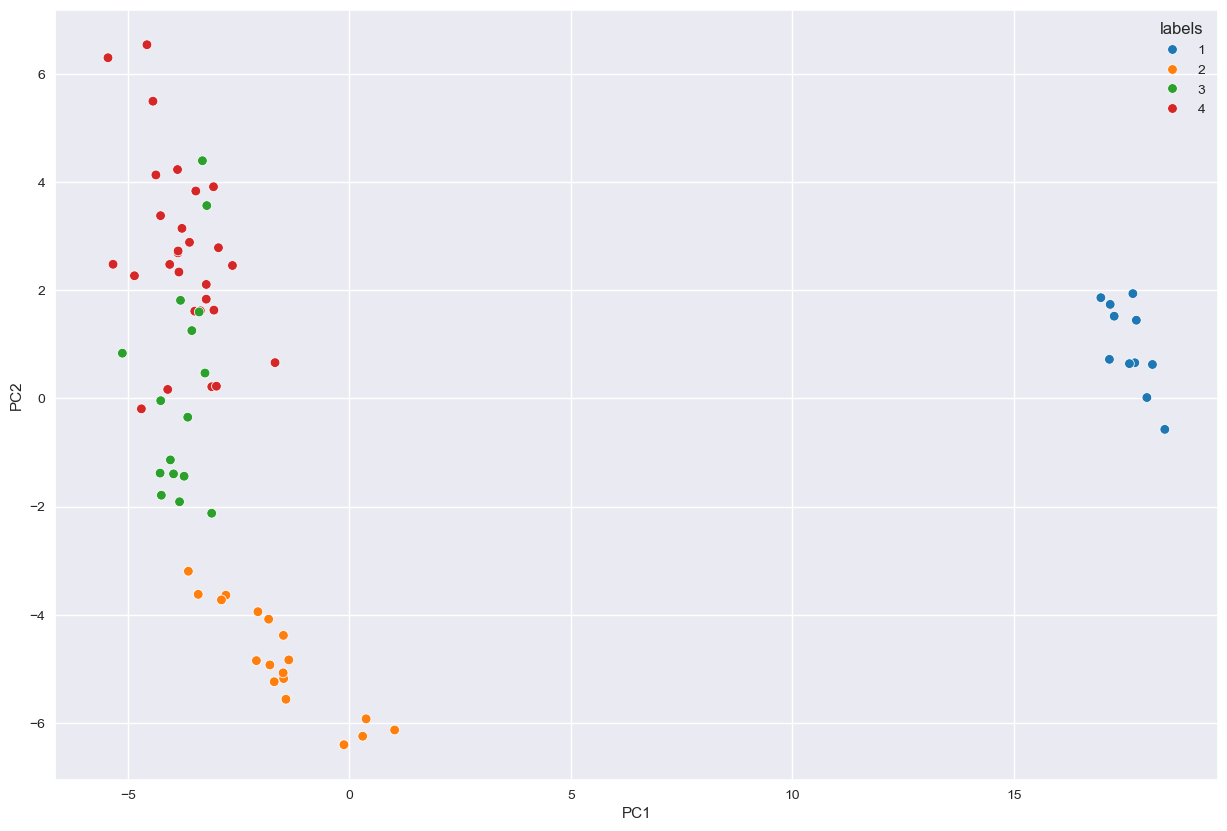

In [366]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', hue='labels', data=X_new, palette='tab10');

Details in the above dendrogram plot are too small to read. Allow us to break it down for you. 

**We have kept the overall rating threshold at 85 just because we wanted to keep the plot clean and not crowded with information. In dendogram, if we make cut at distance 18 (shown in plot with dark blue dotted lines), we get 4 clusters. On the left side, green clusters contained all goalkeepers. While, on the right side, we have red cluster which is combination of defenders, midfielders and strikers. If you focus on only red clusters, the left most group of palyers are defenders, middle ones are midfielders and right most cluster houses all strikers.**

These clusters resembles the ones which we have already plotted using KMeans model. Although, it appears that hierarchial model making more mistakes, but, in principle, the hierarchial clustering provided similar results.

## Challenges


During the data analysis phase of this project, we faced several challenges that required different techniques to overcome. Some of the challenges are listed below along with the techniques we used to tackle them:

**Missing Data:** The dataset provided to us had several missing values in various columns. After analysing, it was noticed that they were not randomly missing. We found the pattern. For example, for all the goalkeepers, the attacking attributes were missing. Similarly, for players apart from goalkeepers, the goalkeeping attributes were missing. So, we replaced these missing values with 0. We decided to drop the column in which the proportion of missing values was significantly high.

**Categorical Variables:** The dataset had several categorical variables, such as player position, preferred foot, and work rate. We did not consider these attributes while building the model. KMeans is a distance-based clustering algorithm that calculates the distance between data points to assign them to a cluster. Categorical attributes are non-numeric and do not have a natural notion of distance. For example, consider a categorical attribute like "position" which has values such as "striker," "defender," "midfielder," etc. It does not make sense to calculate the distance between these categories as they are not numerical values.

**Outliers:** Since KMeans clustering is a distance-based algorithm, it is sensitive to the scale and range of the variables used in the analysis. Therefore, it was necessary to preprocess the data by standardizing and scaling the numerical variables to make them comparable and reduce the influence of outliers.

**High Dimensionality:** The primary challenge faced during the development of the clustering model for FIFA players was the high dimensionality of the dataset. The dataset had a high number of features, which could lead to overfitting and increased computational complexity. The original dataset contained 104 attributes, including categorical and numerical variables.To overcome this, we used PCA to reduce the dimensionality of the dataset while preserving the maximum amount of variance.

**Clustering:** Another challenge was selecting the optimal number of clusters for the model. Although the Elbow method can be used to determine the number of clusters, it can be subjective and inconclusive. The Silhouette score was used to evaluate the quality of the clustering, but even with this metric, it was challenging to determine the optimal number of clusters since the scores were not consistent across different cluster sizes.

#### Result:
- We highly recommend to deploy the K-Means Clustering Model to the Prodution for having the best intution of players with respect to their skills